Il Behavioral Risk Factor Surveillance System (BRFSS) è il principale sistema nazionale di indagini telefoniche relative alla salute che raccolgono dati statali sui residenti negli Stati Uniti in merito ai loro comportamenti a rischio legati alla salute, alle condizioni di salute croniche e all’uso dei servizi di prevenzione.

L'obiettivo del BRFSS è quello di raccogliere informazioni uniformi, specifiche per stato, che includano l'uso del tabacco, la conoscenza e la prevenzione dell'HIV/AIDS, l'esercizio fisico, le vaccinazioni, lo stato di salute, i giorni sani - qualità della vita correlata alla salute, accesso all'assistenza sanitaria, sonno inadeguato, consapevolezza dell'ipertensione, colesterolo consapevolezza, condizioni di salute croniche, consumo di alcol, consumo di frutta e verdura, carico di artrite e uso delle cinture di sicurezza.
Il presente dataset considera 21 delle 330 feature della raccolta originale con l’obiettivo di predire i soggetti con diabete in base alle risposte date nel survey.


Obiettivo del progetto è effettuare un tipico processo di Data Mining, utilizzando tecniche statistiche congiunte ad algoritmi di Machine Learning per compiere un task di classificazione del dataset allegato relativo ai dati clinici contenuto nel dataset denominato “Diabetes Health indicators dataset".

In [ ]:
import pandas as pd
from pandas import read_csv
from pandas import set_option
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.image as mpimg
from matplotlib import gridspec
import numpy as np
from numpy import set_printoptions
import sklearn
import seaborn as sb
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import plotly.figure_factory as ff
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install scikit-learn-intelex
from sklearnex import patch_sklearn

patch_sklearn()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 MB 10.8 MB/s eta 0:00:00


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
import io

data=pd.read_csv('https://raw.githubusercontent.com/luigiscalisi/datamining/main/diabetes_train.csv')


names=["Diabetes_012", "HighBP", "HighChol", "CholCheck", "BMI","Smoker" ,"Stroke" ,"HeartDiseaseorAttack"  ,"PhysActivity" ,"Fruits" ,"Veggies","HvyAlcoholConsump" ,"AnyHealthcare" ,"NoDocbcCost" ,"GenHlth" , "MentHlth" ,"PhysHlth" ,"DiffWalk" ,"Sex","Age","Education","Income"]

data

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     0.0       0.0        1.0  15.0     0.0     0.0   
1                0.0     1.0       1.0        1.0  35.0     1.0     0.0   
2                0.0     0.0       0.0        1.0  28.0     1.0     0.0   
3                0.0     0.0       0.0        1.0  30.0     0.0     0.0   
4                2.0     0.0       1.0        1.0  32.0     1.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
189097           0.0     1.0       0.0        1.0  29.0     0.0     0.0   
189098           0.0     0.0       0.0        1.0  18.0     0.0     0.0   
189099           0.0     0.0       1.0        1.0  21.0     0.0     0.0   
189100           0.0     NaN       0.0        1.0  28.0     1.0     0.0   
189101           0.0     0.0       0.0        1.0  21.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        0.0           1.0     1.0  ...            1.0   
1                        0.0           1.0     0.0  ...            1.0   
2                        0.0           1.0     1.0  ...            1.0   
3                        0.0           0.0     1.0  ...            1.0   
4                        0.0           0.0     0.0  ...            1.0   
...                      ...           ...     ...  ...            ...   
189097                   0.0           1.0     1.0  ...            1.0   
189098                   0.0           1.0     0.0  ...            1.0   
189099                   0.0           1.0     1.0  ...            1.0   
189100                   0.0           1.0     1.0  ...            1.0   
189101                   0.0           1.0     0.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk     Sex   Age  \
0               0.0      5.0      15.0      28.0       1.0  Female   7.0   
1               0.0      3.0       0.0       0.0       0.0    Male   8.0   
2               0.0      3.0       0.0       0.0       0.0    Male  10.0   
3               0.0      3.0       0.0       0.0       0.0    Male   7.0   
4               0.0      2.0      14.0      30.0       0.0    Male  10.0   
...             ...      ...       ...       ...       ...     ...   ...   
189097          0.0      2.0       0.0       0.0       1.0  Female   9.0   
189098          0.0      2.0       0.0       0.0       0.0  Female  12.0   
189099          0.0      3.0       1.0       1.0       0.0  Female   7.0   
189100          0.0      3.0       0.0       0.0       0.0    Male  11.0   
189101          0.0      2.0       0.0       2.0       0.0    Male   1.0   

       Education  Income  
0            5.0     5.0  
1            5.0     9.0  
2            6.0     5.0  
3            5.0     8.0  
4            4.0     6.0  
...          ...     ...  
189097       6.0     1.0  
189098       6.0     9.0  
189099       6.0     8.0  
189100       5.0    11.0  
189101       4.0     5.0  

[189102 rows x 22 columns]

1. ANALISI DEL DATASET

Il primo passaggio è quello di studiare il tipo di dato informatico per ciascuna feature


In [ ]:
data.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                      object
Age                     float64
Education               float64
Income                  float64
dtype: object

Si osserva come la maggior parte dei dati sono di tipo float pur essendo molti di essi a parte decimale nulla.


In [ ]:
for name in names:
    print('I valori unici della feature {} sono {}'.format(name,len(data[name].unique())))

I valori unici della feature Diabetes_012 sono 3
I valori unici della feature HighBP sono 3
I valori unici della feature HighChol sono 3
I valori unici della feature CholCheck sono 3
I valori unici della feature BMI sono 81
I valori unici della feature Smoker sono 3
I valori unici della feature Stroke sono 3
I valori unici della feature HeartDiseaseorAttack sono 3
I valori unici della feature PhysActivity sono 3
I valori unici della feature Fruits sono 3
I valori unici della feature Veggies sono 3
I valori unici della feature HvyAlcoholConsump sono 3
I valori unici della feature AnyHealthcare sono 3
I valori unici della feature NoDocbcCost sono 3
I valori unici della feature GenHlth sono 6
I valori unici della feature MentHlth sono 32
I valori unici della feature PhysHlth sono 32
I valori unici della feature DiffWalk sono 3
I valori unici della feature Sex sono 4
I valori unici della feature Age sono 14
I valori unici della feature Education sono 7
I valori unici della feature Income s

Si verificano le dimensioni del dataset in termini di istanze e features:

In [ ]:
#Dimensione del Dataset
shape = data.shape
print(shape)

(189102, 22)


Dal risultato ottenuto è confermata la presenza di 189102 istanze e 22 features. Consideriamo nel particolare le informazioni riguardo le features:

**Diabetes_012** indica presenza di diabete (0.no diabete, 1.prediabete,
2.diabetes)

**HighBP** Pressione sanguigna alta 0.no, 1.pressione sanguigna alta

**HighChol** Colesterolo alto 0.no, 1.alto

**CholCheck** Controllo colesterolo  0.non fatto in 5 anni,
1.si controllo fatto in 5 anni

**BMI** Indice di massa corporea

**Smoker** Se il soggetto ha fumato almeno 100 sigarette in tutta la vita ( 5 pacchetti= 100 sigarette)

0.no, 1.Si

**Stroke**  Se il soggetto ha avuto un ictus.
0.no, 1.Si

**HeartDiseaseorAttack** Se il soggetto ha avuto malattie del cuore coronariche o infarto del miocardio (0.no, 1.yes)

**PhysActivity** Attività fisica svolta negli ultimi 30 giorni escluso il lavoro (0.no, 1.Si)

**Fruits** Consumo di frutta 1 o più volte al giorno (0.no, 1.Si)

**Veggies** Consumo diverdura 1 o più volte al giorno ( 0.no, 1.si)

**HvyAlcoholConsum** forte bevitore (uomini adulti che consuano più di 14 drink a settimana e donne adulte che ne consumano più di 7 (0.no, 1.Si)

**AnyHealthcare** Se si hanno assicurazioni sanitarie (0.no, 1.si)

**NoDocbcCost** Se nei precedenti 12 mesi non si è potuto consultare un medico a causa dei costi (0.no, 1.si)

**GenHlth** Autovalutazione stato salute generale su una scala da 1-5
(1.excellent, 2.very good, 3.good, 4.fair, 5.poor)

**MentHlth**  Autovalutazione salute mentale (include stress,depressione e problemi con emozioni. Per quanti giorni durante gli ultmi 30 giorni la tua salute mentale non era ottima?(scala 1-30 giorni)

**PhysHlth** Autovalutazione salute fisica (include malore fisico,ferite ecc.)
Per quanti giorni durante gli ultmi 30 giorni la tua salute mentale non era ottima?(scala 1-30 giorni)

**DiffWalk** Difficoltà a camminare o salire le scale? (0.no, 1.si)

**Sex** Female, Male

**Age**-Scala che indica le fasce di età 1 = 18-24 anni 9 = 60-64 anni 13 = 80 ed oltre

**Education** livelo di educazione scolastica scala 1-6

**Income** Reddito del soggetto  scala 1-8 1. meno di 10,000 dollari, 5.meno di
35,000,  8.75,000 e oltre





In [ ]:
#Distribuzione delle classi
class_counts = data.groupby('Diabetes_012').size()
print(class_counts)



Diabetes_012
0.0    157830
1.0      4509
2.0     26763
dtype: int64


<Axes: xlabel='Diabetes_012', ylabel='count'>

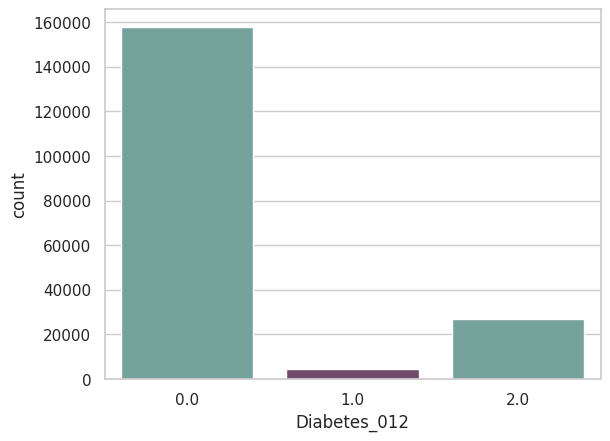

In [ ]:
cols= ["#6daa9f","#774571"]
sb.countplot(x= data["Diabetes_012"], palette= cols)

Si può notare come la feature target sia Diabetes_012 che indica presenza di diabete (0.no diabete, 1.prediabete, 2.diabete)


Se vogliamo fare una classificazione binaria tra diabetici e non diabetici, ciò può essere realizzato unendo i prediabetici ai diabetici, ai non diabetici o eliminandoli completamente. Si potrebbero  aggiungere al gruppo dei diabetici,oppure al gruppo di non diabetici in quanto è una condizione non sufficiente a poter diagnosticare il diabete vero e proprio

Per prima cosa quindi rendo la feature target binaria e quindi sostitisco ai diabetici che avevano label 2 la label 1, e ai prediabetici sostituisco 1 a 0 in modo da tale da avere ora **0 NON DIABETICO E PREDIABETICO** ed **1** come label della classe **DIABETICO** .




















In [ ]:

brfss_binary = data

brfss_binary['Diabetes_012'] = brfss_binary['Diabetes_012'].replace({1:0})
brfss_binary['Diabetes_012'] = brfss_binary['Diabetes_012'].replace({2:1})

#Chiamo ora la feature come  Diabetes_binary
brfss_binary = brfss_binary.rename(columns = {'Diabetes_012': 'Diabetes_binary'})
brfss_binary.Diabetes_binary.unique()

array([0., 1.])

In [ ]:
brfss_binary.groupby(['Diabetes_binary']).size()

Diabetes_binary
0.0    162339
1.0     26763
dtype: int64

<Axes: xlabel='Diabetes_binary', ylabel='count'>

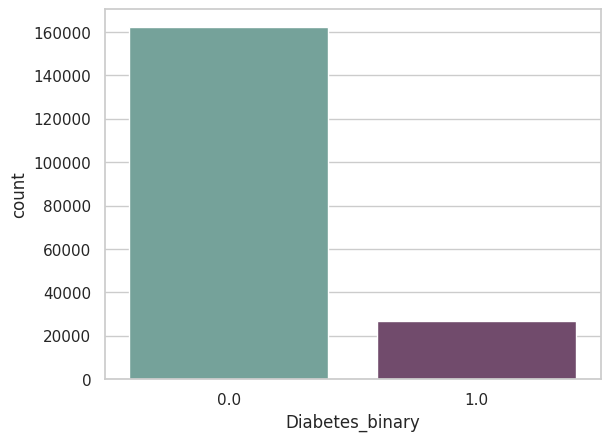

In [ ]:
cols= ["#6daa9f","#774571"]
sb.countplot(x= brfss_binary["Diabetes_binary"], palette= cols)

Ci troviamo quindi di fronte ad un dataset sbilanciato in cui la feature target non è distribuita in modo omogeneo, notiamo infatti come ci siano decisamente molti più record appertenenti alla classe 0 rispetto alla classe 1 con un ulteriore aumento dopo aver ridotto la feature target ad una feature binaria.

Una tecninca potrebbe essere quella dell'**UNDER-SAMPLING**

Quando una classe è sovrarappresentata, i modelli di apprendimento automatico possono avere la tendenza a favorire la predizione della classe maggioritaria a discapito delle classi minoritarie. L'undersampling risolve questo problema riducendo il numero di campioni della classe maggioritaria in modo casuale o strategico.


Una volta individuata la classe maggioritaria, la funzione Random UnderSampler seleziona casualmente un numero di campioni da questa classe in modo che il numero di campioni nella classe maggioritaria sia ridotto a un livello più bilanciato rispetto alla classe minoritaria

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

X =brfss_binary [['HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'BMI']]
y = brfss_binary[['Diabetes_binary']]
rus = RandomUnderSampler(sampling_strategy=1)
X_res, y_res = rus.fit_resample(X,y)
data_resampled = pd.DataFrame(X_res, columns=X.columns)
data_resampled['Diabetes_binary'] = y_res

#Faccio uno shuffle delle righe in quanto ora nel dataset ho prima tutte le label non diabete e poi quelle Diabete
#data_resampled=data_resampled.sample(frac=1, random_state=42).reset_index(drop=True)
data_resampled

HighBP  HighChol  CholCheck  Smoker  Stroke  HeartDiseaseorAttack  \
0         0.0       0.0        1.0     0.0     0.0                   0.0   
1         0.0       0.0        1.0     1.0     0.0                   1.0   
2         0.0       0.0        1.0     1.0     0.0                   0.0   
3         0.0       0.0        1.0     0.0     0.0                   0.0   
4         1.0       1.0        1.0     0.0     0.0                   1.0   
...       ...       ...        ...     ...     ...                   ...   
53521     0.0       0.0        1.0     0.0     1.0                   1.0   
53522     0.0       1.0        1.0     0.0     0.0                   0.0   
53523     1.0       1.0        1.0     1.0     1.0                   1.0   
53524     1.0       0.0        1.0     0.0     0.0                   1.0   
53525     0.0       0.0        1.0     0.0     0.0                   0.0   

       PhysActivity  Fruits  Veggies  HvyAlcoholConsump  ...  GenHlth  \
0               0.0     0.0      1.0                0.0  ...      1.0   
1               0.0     0.0      0.0                0.0  ...      2.0   
2               0.0     0.0      0.0                0.0  ...      3.0   
3               0.0     1.0      1.0                0.0  ...      3.0   
4               1.0     0.0      0.0                0.0  ...      2.0   
...             ...     ...      ...                ...  ...      ...   
53521           0.0     1.0      1.0                0.0  ...      4.0   
53522           1.0     1.0      1.0                0.0  ...      3.0   
53523           1.0     1.0      1.0                0.0  ...      4.0   
53524           0.0     0.0      0.0                0.0  ...      2.0   
53525           1.0     1.0      1.0                0.0  ...      3.0   

       MentHlth  PhysHlth  DiffWalk     Sex   Age Education  Income   BMI  \
0           0.0       0.0       0.0  Female  11.0       6.0     9.0  33.0   
1           0.0       0.0       0.0    Male   7.0       6.0     9.0  23.0   
2          15.0       0.0       0.0    Male   3.0       3.0     5.0  21.0   
3          10.0      20.0       0.0  Female   7.0       4.0     7.0  27.0   
4           0.0       0.0       0.0    Male  11.0       6.0     7.0  32.0   
...         ...       ...       ...     ...   ...       ...     ...   ...   
53521       0.0       0.0       1.0    Male   9.0       3.0     5.0  31.0   
53522       4.0       2.0       0.0  Female  11.0       6.0     5.0  39.0   
53523       0.0      30.0       1.0    Male   7.0       5.0     5.0  22.0   
53524      30.0       0.0       0.0    Male  11.0       5.0     5.0  32.0   
53525       0.0       0.0       0.0    Male   9.0       6.0     8.0  29.0   

       Diabetes_binary  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
...                ...  
53521              1.0  
53522              1.0  
53523              1.0  
53524              1.0  
53525              1.0  

[53526 rows x 22 columns]

In [ ]:
data_resampled.groupby(['Diabetes_binary']).size()

Diabetes_binary
0.0    26763
1.0    26763
dtype: int64

<Axes: xlabel='Diabetes_binary', ylabel='count'>

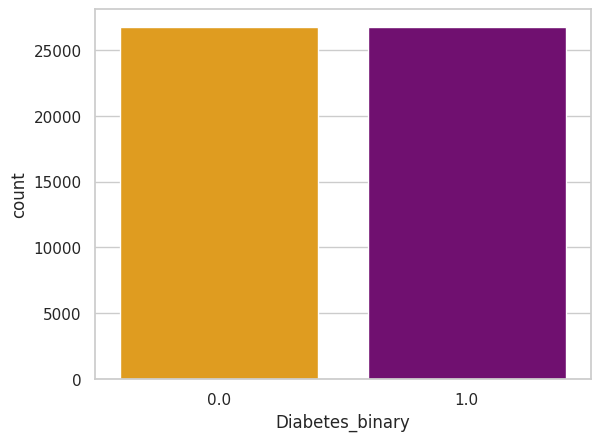

In [ ]:
cols= ["orange","purple"]
sb.countplot(x= data_resampled["Diabetes_binary"], palette= cols)

Dalla figura si osserva quindi come ora il dataset sia perfettamente bilanciato evitando così problematiche tipiche dei dataset sbilanciati come:modelli che sviluppano un forte bias verso la classe maggioritaria, ignorando o sottostimando le classi minoritarie, Cattiva generalizzazione delle classi minoritarie e valori di accuratezza estremamente alti che non sono però sintomo di una buona affidabilità del modello di apprendimento


In alcuni casi può verificarsi il problema dei dati mancanti o di righe duplicate. Per ottenere un dato pulito dal quale ricavare una conoscenza utile si prosegue con un'esplorazione tabulare al fine di individuare la presenza di tali problematiche.

In [ ]:
#Valori nulli e righe duplicate
display(data_resampled.isnull())
display(data_resampled.duplicated(subset=None, keep='first'))

HighBP  HighChol  CholCheck  Smoker  Stroke  HeartDiseaseorAttack  \
0       False     False      False   False   False                 False   
1       False     False      False   False   False                 False   
2       False     False      False   False   False                 False   
3       False     False      False   False   False                 False   
4       False     False      False   False   False                 False   
...       ...       ...        ...     ...     ...                   ...   
53521   False     False      False   False   False                 False   
53522   False     False      False   False   False                 False   
53523   False     False      False   False   False                 False   
53524   False     False      False   False   False                 False   
53525   False     False      False   False   False                 False   

       PhysActivity  Fruits  Veggies  HvyAlcoholConsump  ...  GenHlth  \
0             False   False    False              False  ...    False   
1             False   False    False              False  ...    False   
2             False   False    False              False  ...    False   
3             False   False    False              False  ...    False   
4             False   False    False              False  ...    False   
...             ...     ...      ...                ...  ...      ...   
53521         False   False    False              False  ...    False   
53522         False   False    False              False  ...    False   
53523         False   False    False              False  ...    False   
53524         False   False    False              False  ...    False   
53525         False   False    False              False  ...    False   

       MentHlth  PhysHlth  DiffWalk    Sex    Age  Education  Income    BMI  \
0         False     False     False  False  False      False   False  False   
1         False     False     False  False  False      False   False  False   
2         False     False     False  False  False      False   False  False   
3         False     False     False  False  False      False   False  False   
4         False     False     False  False  False      False   False  False   
...         ...       ...       ...    ...    ...        ...     ...    ...   
53521     False     False     False  False  False      False   False  False   
53522     False     False     False  False  False      False   False  False   
53523     False     False     False  False  False      False   False  False   
53524     False     False     False  False  False      False   False  False   
53525     False     False     False  False  False      False   False  False   

       Diabetes_binary  
0                False  
1                False  
2                False  
3                False  
4                False  
...                ...  
53521            False  
53522            False  
53523            False  
53524            False  
53525            False  

[53526 rows x 22 columns]

0        False
1        False
2        False
3        False
4        False
         ...  
53521    False
53522    False
53523    False
53524    False
53525    False
Length: 53526, dtype: bool

In [ ]:
#Numero valori nulli e righe duplicate
print('Numero di righe con elementi mancanti', data_resampled.isnull().values.sum())
print('Numero di righe duplicate', data_resampled.duplicated(subset=None, keep='first').sum())


Numero di righe con elementi mancanti 1073
Numero di righe duplicate 475


Un altra modifica al dataset potrebbe essere quella di andare a binarizzare l'unica feature non numerica del dataset ossia **Sex** e porre quindi 1 per il sesso maschile e 0 per quello femminile.


In [ ]:
data_resampled['Sex'] = data_resampled['Sex'].replace({'Male': 1, 'Female': 0})
data_resampled["Sex"] = pd.to_numeric(data_resampled["Sex"], errors="coerce")
data_resampled['Sex'] = data_resampled['Sex'].replace({'M': 1, 'F': 0})
data_resampled["Sex"] = pd.to_numeric(data_resampled["Sex"], errors="coerce")


Potrei quindi pensare di rimuovere tutte le righe che presentano valori nulli in quanto potrebbero essere causa di errori durante la fase di addestramento. Si potrebbe pensare piuttosto che una rimozione delle righe con valore nullo ad una sostituzione dei dati mancanti con ad esempio la media di tutti i valori di quella specifica feature. Ma come si può osservare anche dall'analisi del dataset con diverse metriche si nota come questo non sia possibile trattandosi di dati categorici e per la maggior parte binari in cui gli unici dati ammissibili sono 1 o zero i quali stanno ad indicare la presenza o meno di una determinata condizione

In [ ]:
data_preprocessed=data_resampled.dropna()
nomi=[ "HighBP", "HighChol", "CholCheck", "BMI","Smoker" ,"Stroke" ,"HeartDiseaseorAttack"  ,"PhysActivity" ,"Fruits" ,"Veggies","HvyAlcoholConsump" ,"AnyHealthcare" ,"NoDocbcCost" ,"GenHlth" , "MentHlth" ,"PhysHlth" ,"DiffWalk" ,"Sex","Age","Education","Income","Diabetes_binary"]
data_preprocessed["Sex"].unique()

array([0., 1.])

In [ ]:
data_preprocessed

HighBP  HighChol  CholCheck  Smoker  Stroke  HeartDiseaseorAttack  \
0         1.0       1.0        1.0     0.0     0.0                   0.0   
1         0.0       0.0        1.0     0.0     0.0                   0.0   
2         1.0       0.0        1.0     0.0     0.0                   0.0   
3         0.0       0.0        1.0     1.0     0.0                   0.0   
4         0.0       1.0        0.0     1.0     0.0                   0.0   
...       ...       ...        ...     ...     ...                   ...   
53521     0.0       0.0        1.0     0.0     1.0                   1.0   
53522     0.0       1.0        1.0     0.0     0.0                   0.0   
53523     1.0       1.0        1.0     1.0     1.0                   1.0   
53524     1.0       0.0        1.0     0.0     0.0                   1.0   
53525     0.0       0.0        1.0     0.0     0.0                   0.0   

       PhysActivity  Fruits  Veggies  HvyAlcoholConsump  ...  GenHlth  \
0               1.0     1.0      0.0                0.0  ...      2.0   
1               1.0     1.0      0.0                0.0  ...      2.0   
2               1.0     1.0      1.0                0.0  ...      2.0   
3               1.0     1.0      1.0                0.0  ...      2.0   
4               0.0     0.0      1.0                0.0  ...      2.0   
...             ...     ...      ...                ...  ...      ...   
53521           0.0     1.0      1.0                0.0  ...      4.0   
53522           1.0     1.0      1.0                0.0  ...      3.0   
53523           1.0     1.0      1.0                0.0  ...      4.0   
53524           0.0     0.0      0.0                0.0  ...      2.0   
53525           1.0     1.0      1.0                0.0  ...      3.0   

       MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income   BMI  \
0           4.0       1.0       0.0  1.0  12.0        6.0    11.0  26.0   
1           0.0       1.0       0.0  1.0   2.0        6.0     7.0  40.0   
2          30.0       0.0       0.0  0.0   3.0        6.0     8.0  42.0   
3           0.0       0.0       0.0  0.0   7.0        4.0     7.0  26.0   
4           0.0       3.0       0.0  1.0   5.0        4.0     7.0  40.0   
...         ...       ...       ...  ...   ...        ...     ...   ...   
53521       0.0       0.0       1.0  1.0   9.0        3.0     5.0  31.0   
53522       4.0       2.0       0.0  0.0  11.0        6.0     5.0  39.0   
53523       0.0      30.0       1.0  1.0   7.0        5.0     5.0  22.0   
53524      30.0       0.0       0.0  1.0  11.0        5.0     5.0  32.0   
53525       0.0       0.0       0.0  1.0   9.0        6.0     8.0  29.0   

       Diabetes_binary  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
...                ...  
53521              1.0  
53522              1.0  
53523              1.0  
53524              1.0  
53525              1.0  

[52496 rows x 22 columns]

In [ ]:
data_preprocessed.describe().T



count       mean       std   min   25%   50%   75%  \
HighBP                52496.0   0.546156  0.497870   0.0   0.0   1.0   1.0   
HighChol              52496.0   0.496876  0.499995   0.0   0.0   0.0   1.0   
CholCheck             52496.0   0.976474  0.151567   0.0   1.0   1.0   1.0   
Smoker                52496.0   0.437595  0.496095   0.0   0.0   0.0   1.0   
Stroke                52496.0   0.058766  0.235189   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  52496.0   0.136696  0.343530   0.0   0.0   0.0   0.0   
PhysActivity          52496.0   0.718398  0.449785   0.0   0.0   1.0   1.0   
Fruits                52496.0   0.603875  0.489096   0.0   0.0   1.0   1.0   
Veggies               52496.0   0.810138  0.392196   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     52496.0   0.047413  0.212523   0.0   0.0   0.0   0.0   
AnyHealthcare         52496.0   0.968417  0.174890   0.0   1.0   1.0   1.0   
NoDocbcCost           52496.0   0.066710  0.249521   0.0   0.0   0.0   0.0   
GenHlth               52496.0   2.771716  1.072016   1.0   2.0   3.0   3.0   
MentHlth              52496.0   4.222836  8.296197   0.0   0.0   0.0   4.0   
PhysHlth              52496.0   5.076882  9.527696   0.0   0.0   0.0   5.0   
DiffWalk              52496.0   0.229141  0.420284   0.0   0.0   0.0   0.0   
Sex                   52496.0   0.495085  0.499981   0.0   0.0   0.0   1.0   
Age                   52496.0   8.489733  3.022406   1.0   7.0   9.0  11.0   
Education             52496.0   5.039527  0.979599   1.0   4.0   5.0   6.0   
Income                52496.0   6.559605  2.419204   1.0   5.0   7.0   8.0   
BMI                   52496.0  30.295432  7.087043  13.0  26.0  29.0  34.0   
Diabetes_binary       52496.0   0.499695  0.500005   0.0   0.0   0.0   1.0   

                       max  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                11.0  
BMI                   99.0  
Diabetes_binary        1.0

Mediante la skewness è possibile verificare se il picco della distribuzione si trova più a sinistra rispetto alla media. Infatti, la skewness può avere sia valori positivi che negativi.

In [ ]:
skew = data.skew()
print(skew)

Diabetes_012            2.056873
HighBP                  0.334416
HighChol                0.399937
CholCheck              -4.933753
BMI                     1.352793
Smoker                  0.362919
Stroke                  4.775960
HeartDiseaseorAttack    2.936790
PhysActivity           -1.352082
Fruits                 -0.499713
Veggies                -1.740286
HvyAlcoholConsump       3.621370
AnyHealthcare          -4.888762
NoDocbcCost             3.582868
GenHlth                 0.405111
MentHlth                2.331673
PhysHlth                2.432186
DiffWalk                1.928410
Age                    -0.308955
Education              -0.864777
Income                 -0.413956
dtype: float64


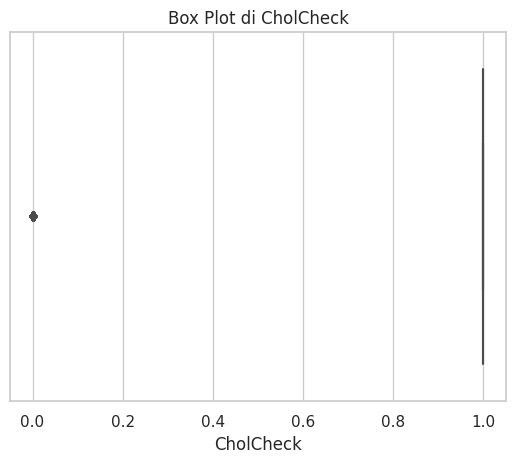

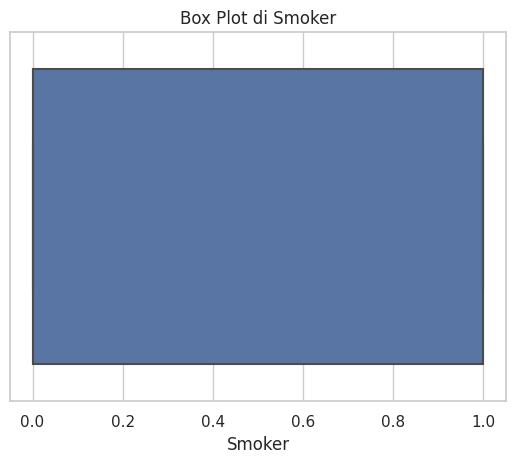

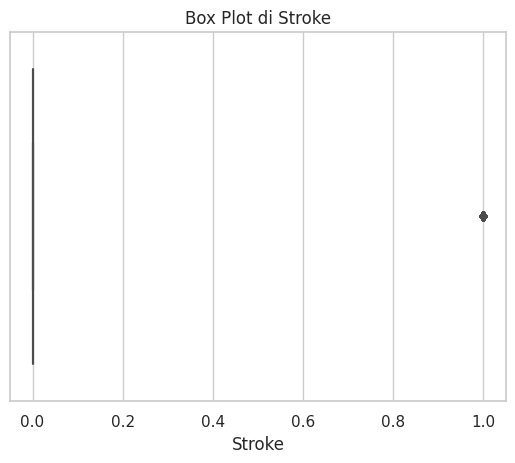

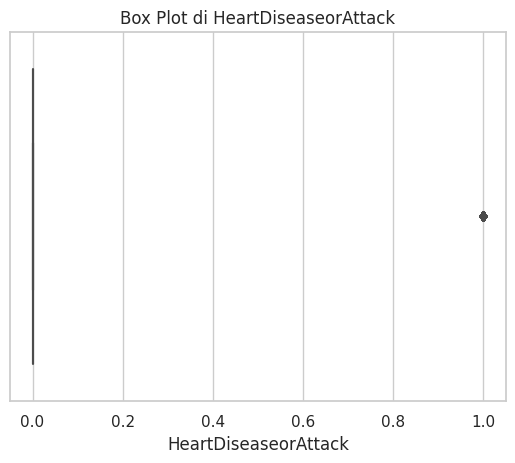

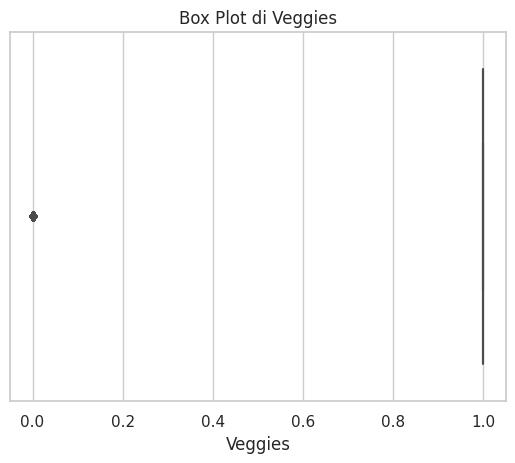

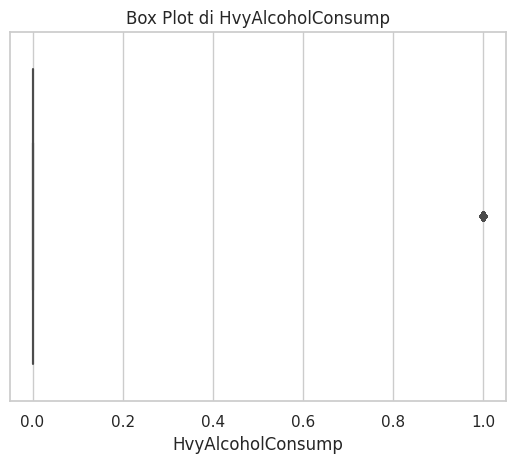

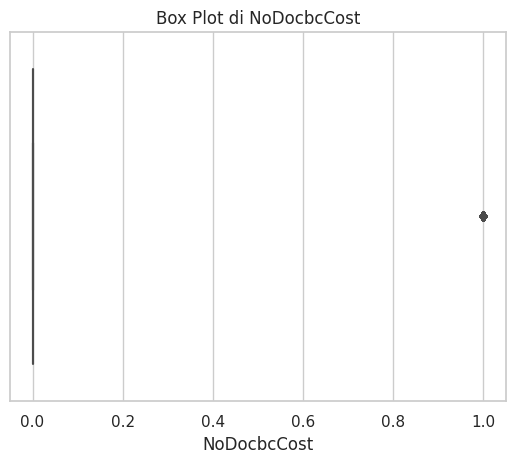

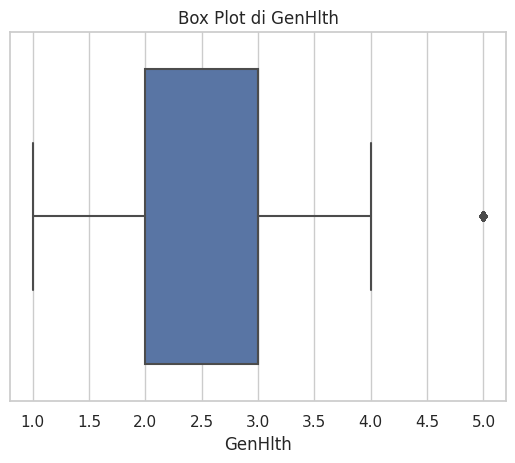

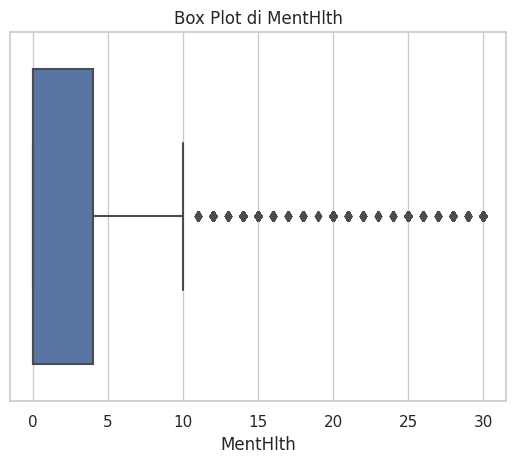

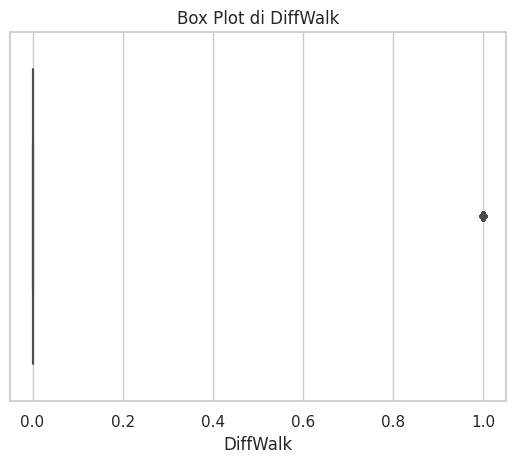

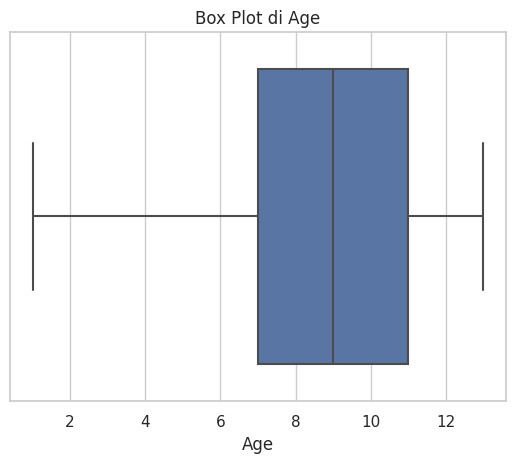

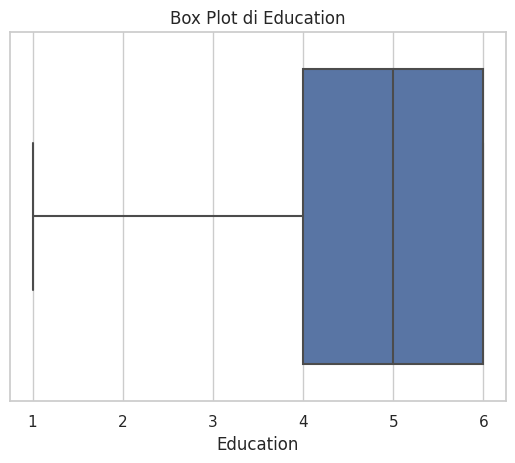

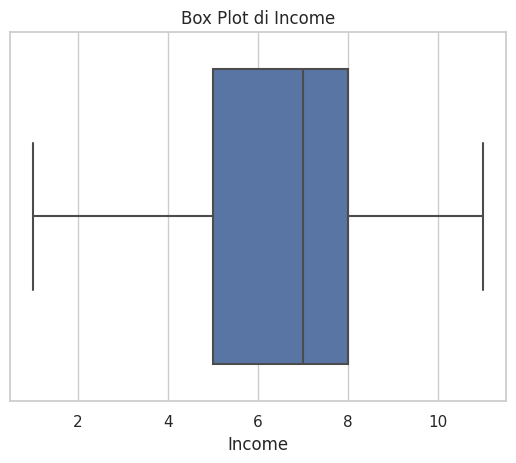

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Selezionare solo le colonne delle feature (escludendo la feature target)
features_only = data_preprocessed.drop('Diabetes_binary', axis=1)
for column in features_only.columns:
    sns.boxplot(x=column, data=data_preprocessed)
    plt.title(f"Box Plot di {column}")
    plt.show()



  Si può osservare come non ha alcun senso visualizzare i box plot perchè la maggior parte delle feature sono **CATEGORICHE o QUALITATIVE** per cui rappresentano solo valori binari.
  
  Altre feature invece come Income, BMI, education, age, PhysHealth, MenHealth e GenHealth possono invece essere rappresentate da un boxplot

In questo caso risulta quindi necessario utilizzare un altro tipo di rappresentazione grafica in quanto il box plot è maggiormente indicato per feature **quantitative**. Si possono quindi utilizzare grafici come bar plot o grafici a torta

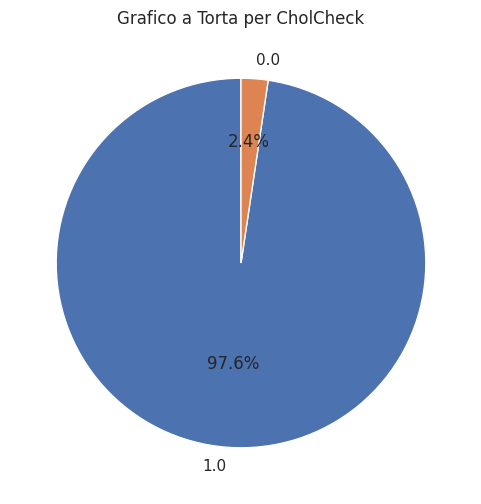

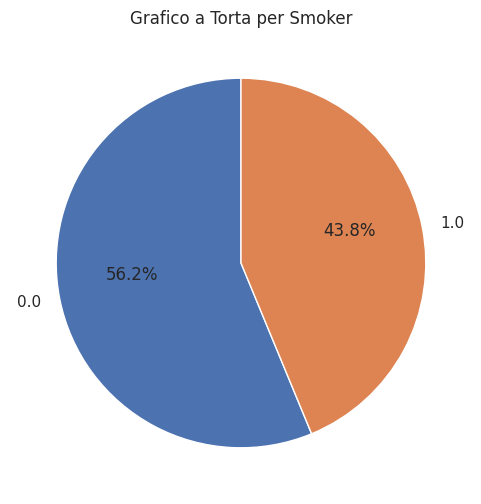

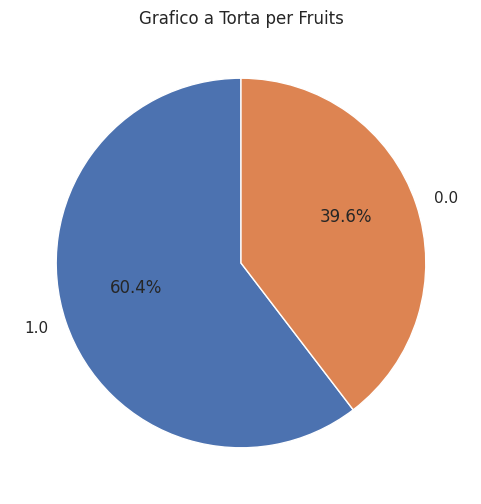

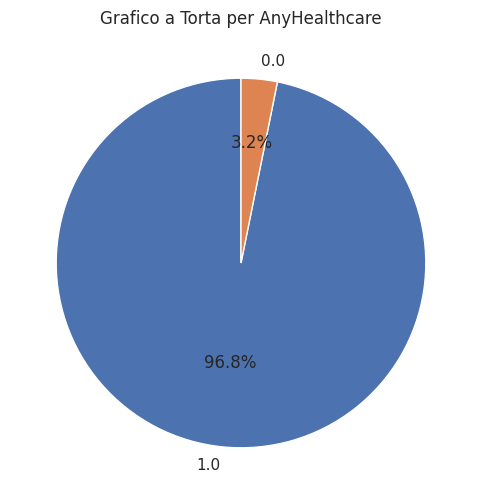

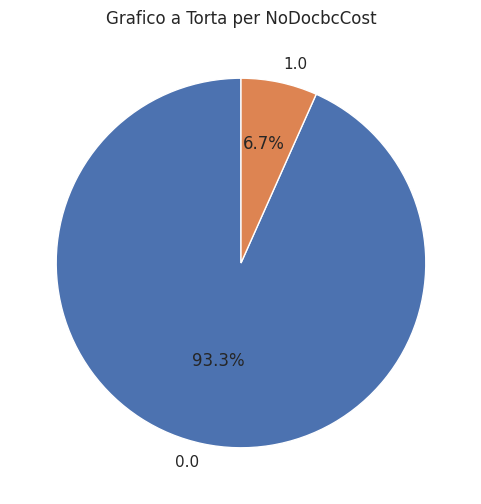

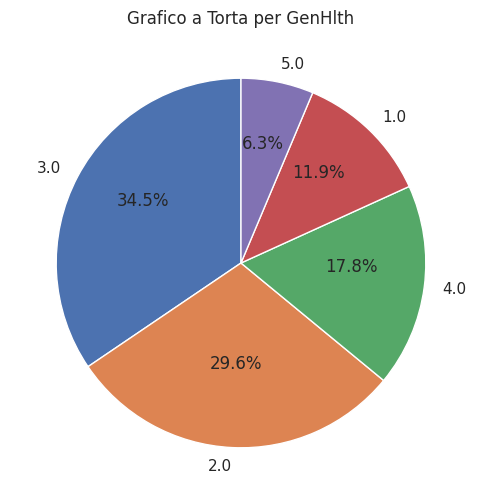

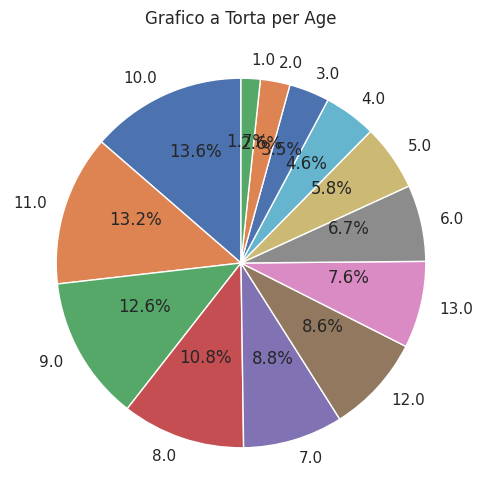

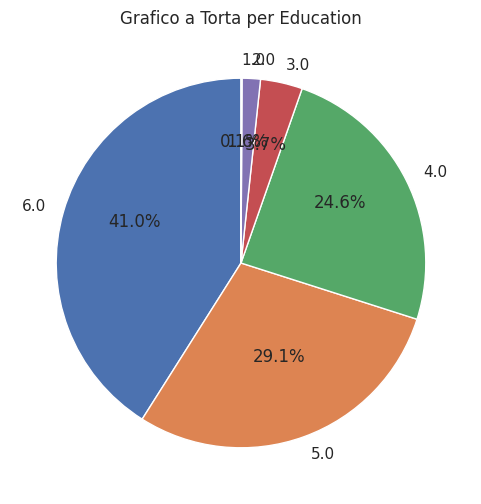

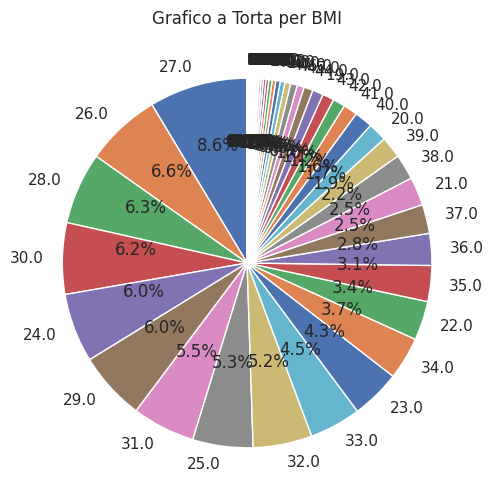

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Selezionare solo le colonne delle feature (escludendo la feature target)
features_only = data_preprocessed.drop('Diabetes_binary', axis=1)

# Creare un grafico a torta per ciascuna feature
for column in features_only.columns:
    value_counts = features_only[column].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(value_counts, labels=value_counts.index,autopct=lambda p: '{:.1f}%\n'.format(p), startangle=90)
    plt.title(f"Grafico a Torta per {column}")
    plt.show()


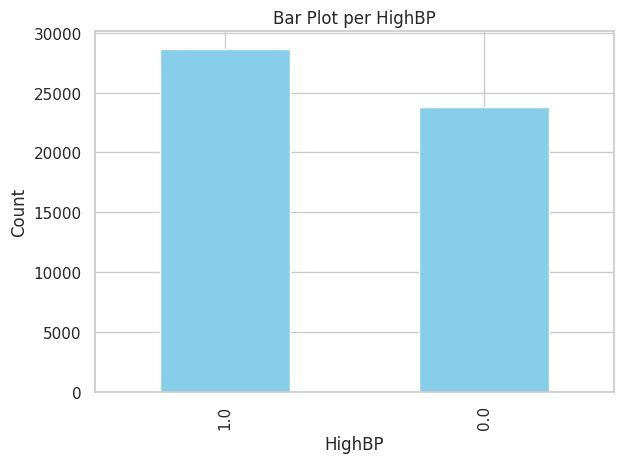

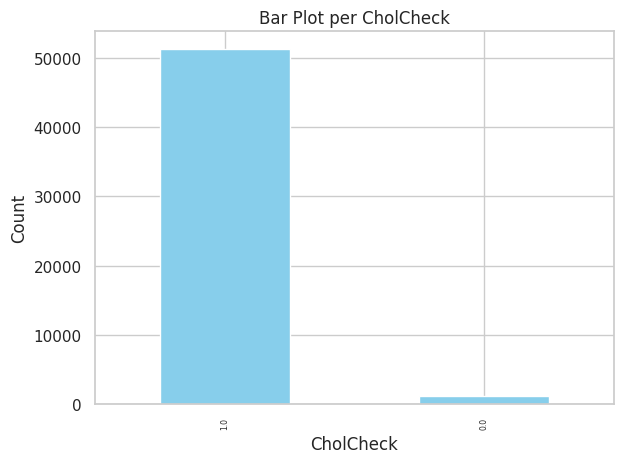

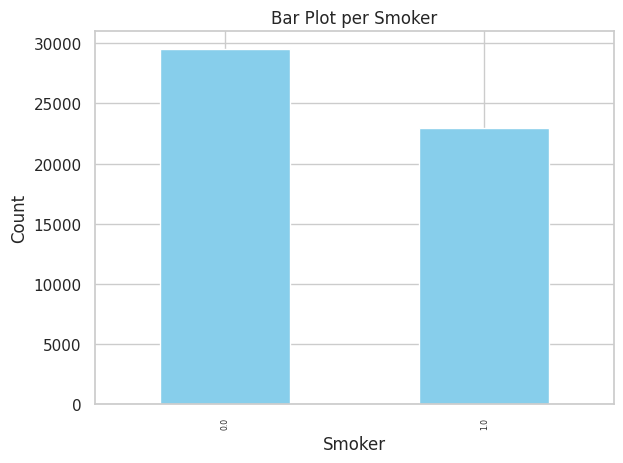

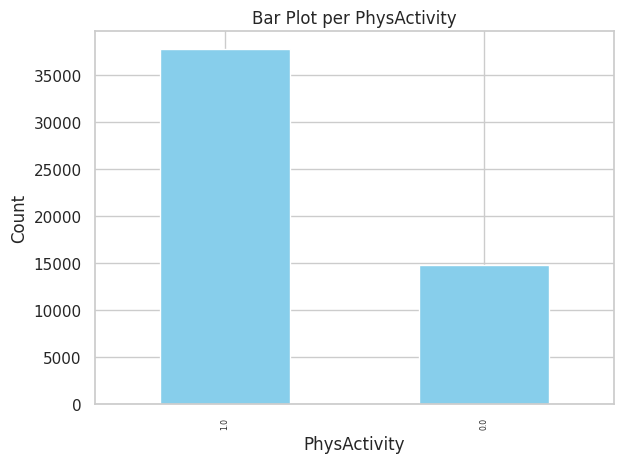

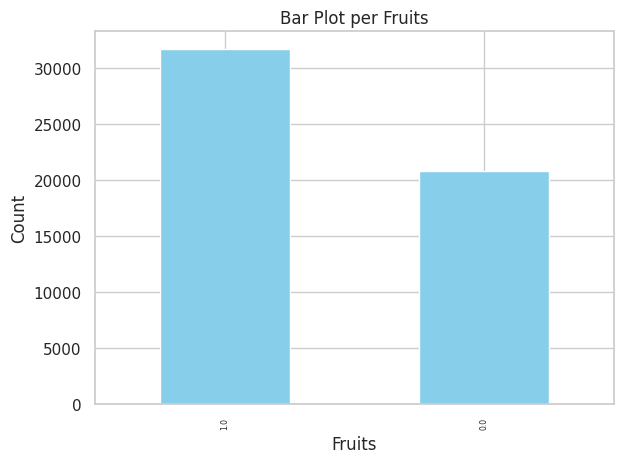

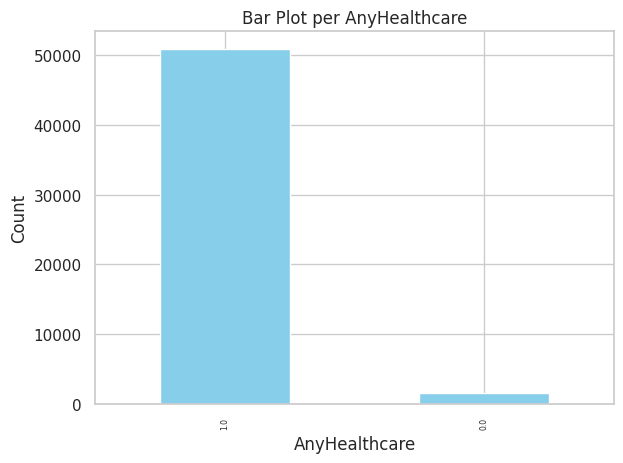

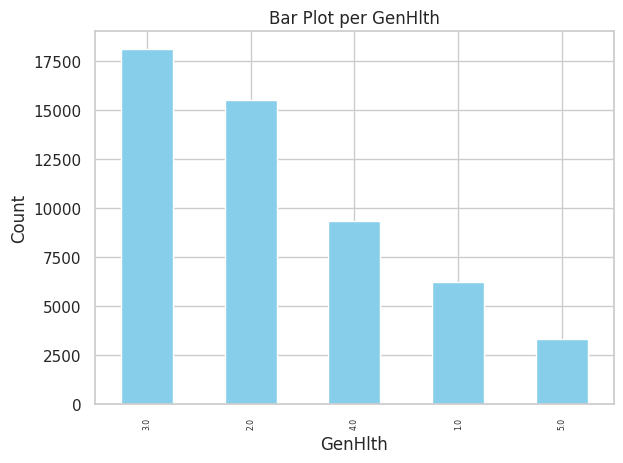

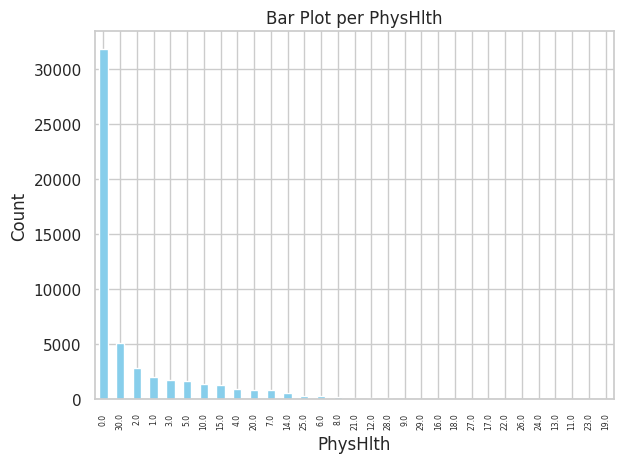

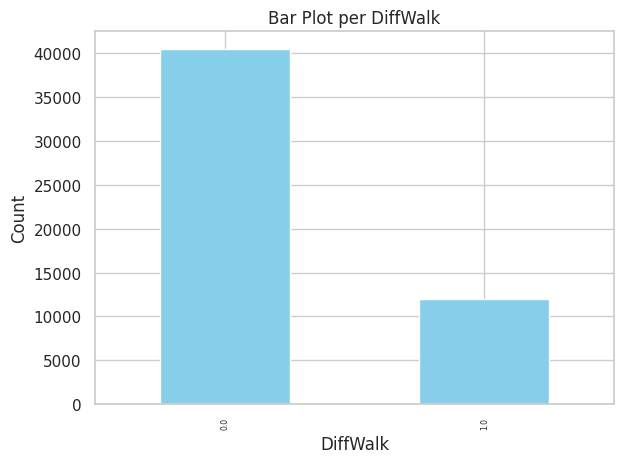

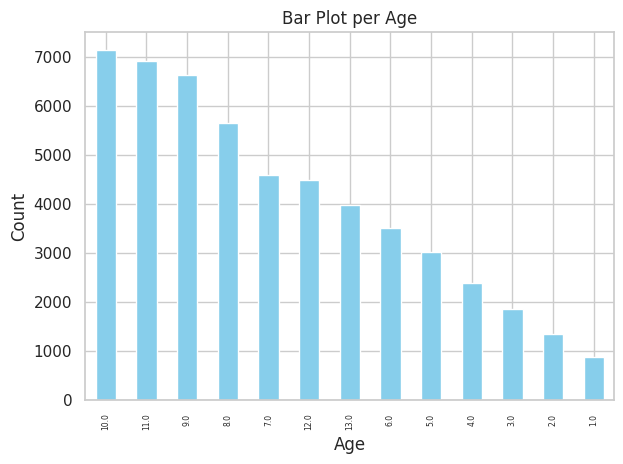

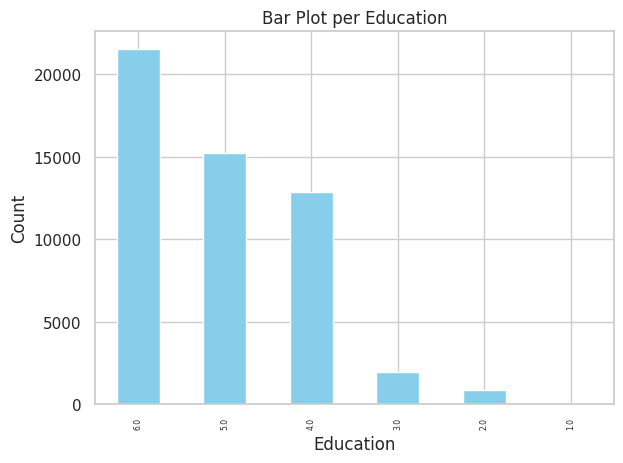

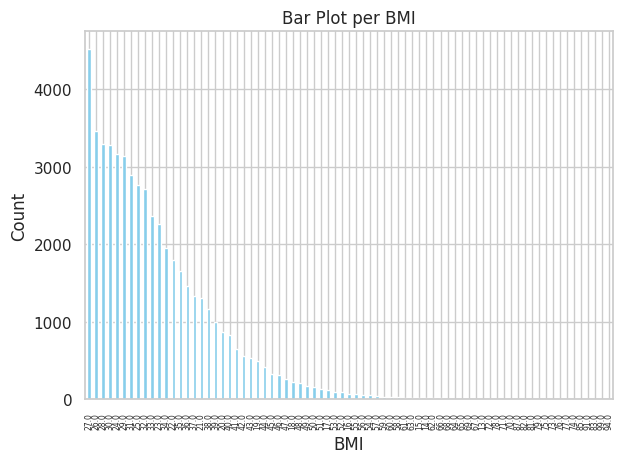

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Selezionare solo le colonne delle feature (escludendo la feature target)
features_only = data_preprocessed.drop('Diabetes_binary', axis=1)
# Creare un bar plot per ciascuna feature
for column in features_only.columns:
    value_counts = features_only[column].value_counts()
    value_counts.plot(kind='bar', rot=90, color='skyblue')
    plt.title(f"Bar Plot per {column}")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.rc('xtick', labelsize=5.5)
    plt.show()


**ISTOGRAMMI**

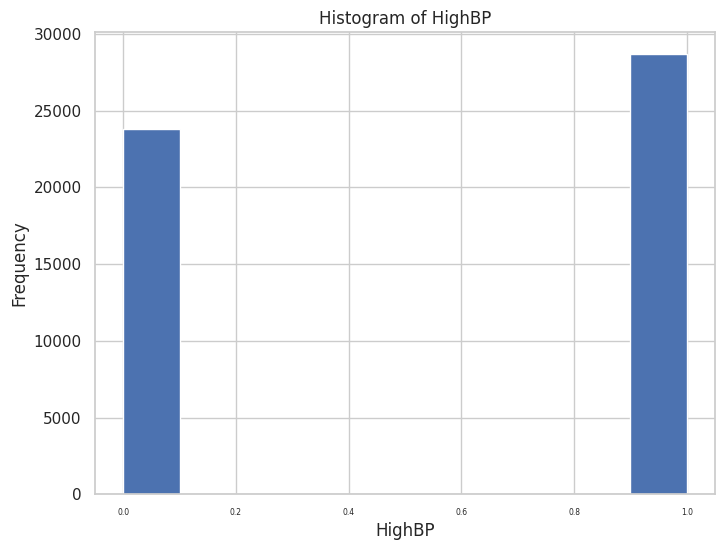

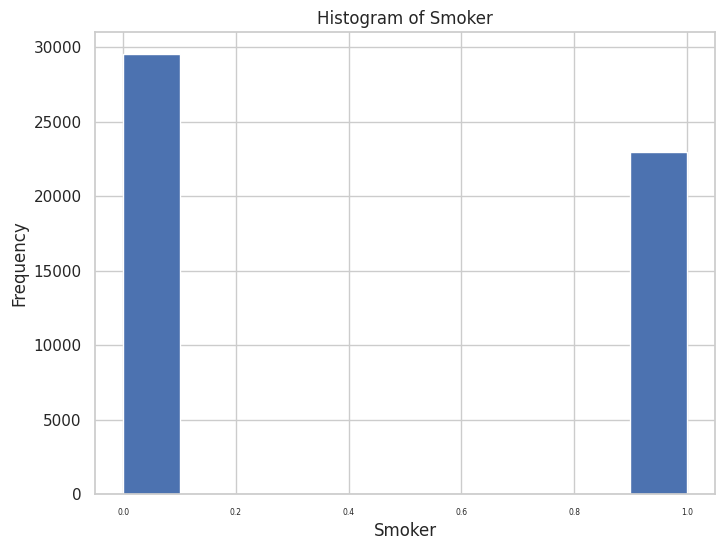

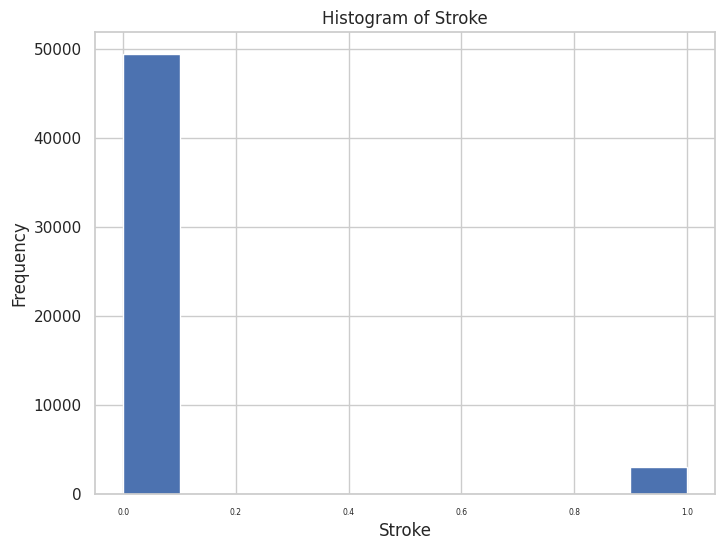

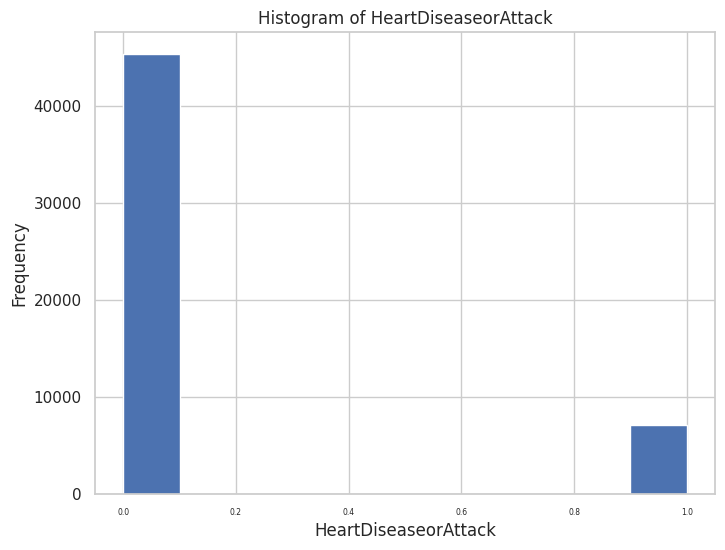

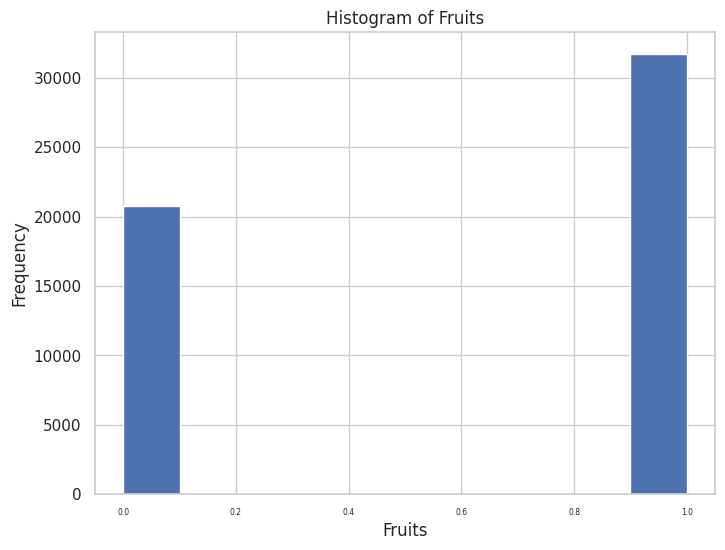

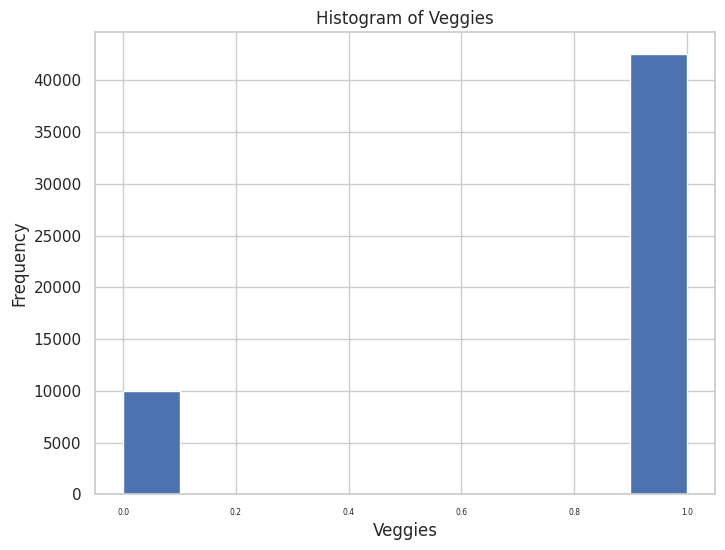

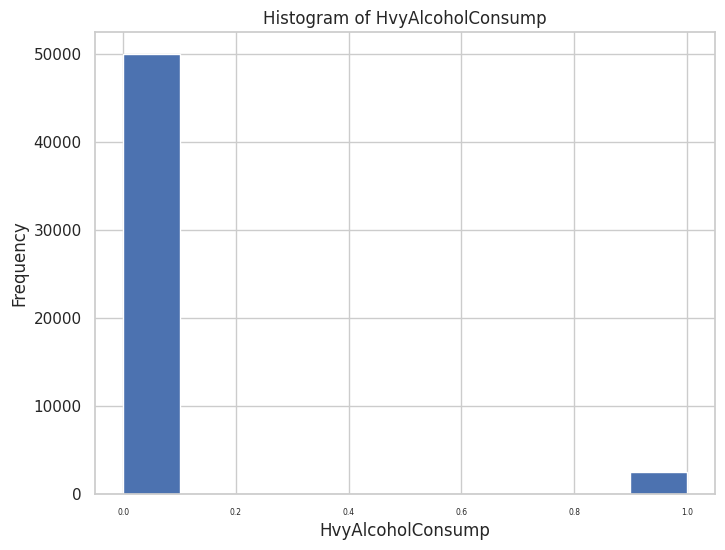

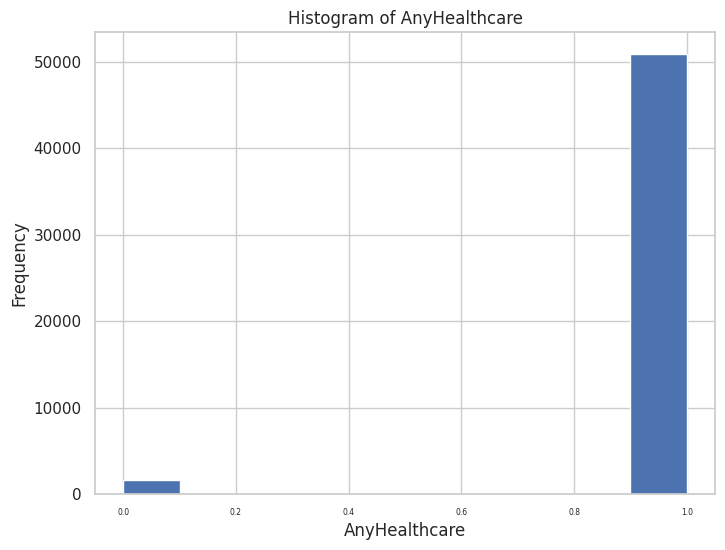

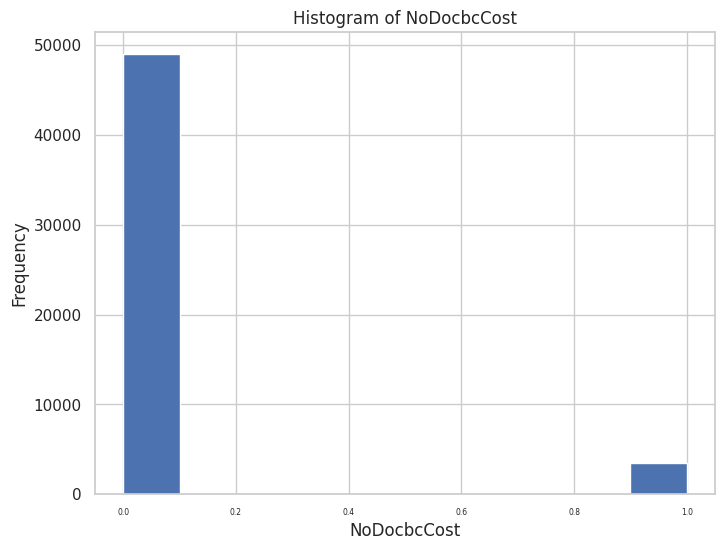

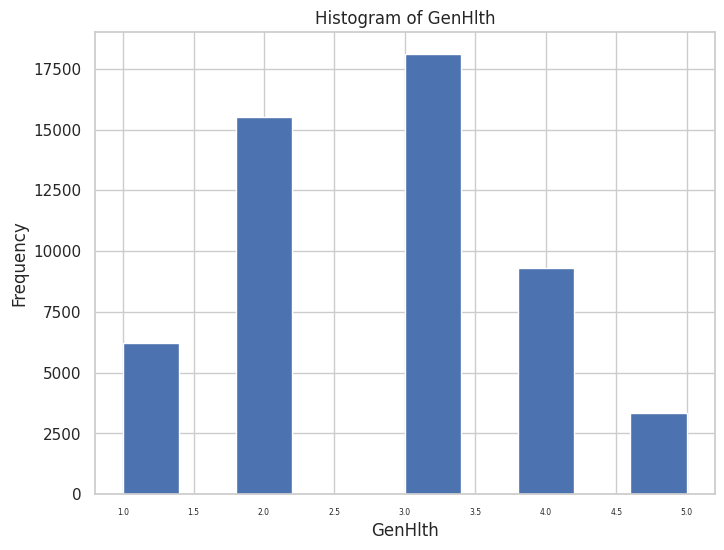

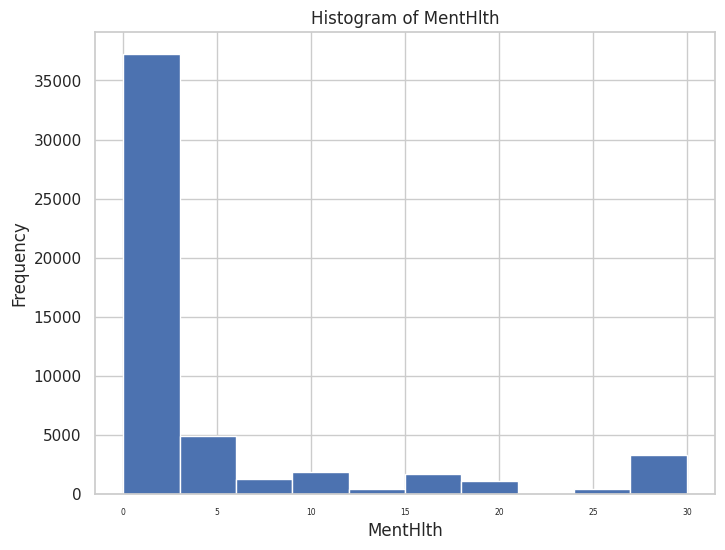

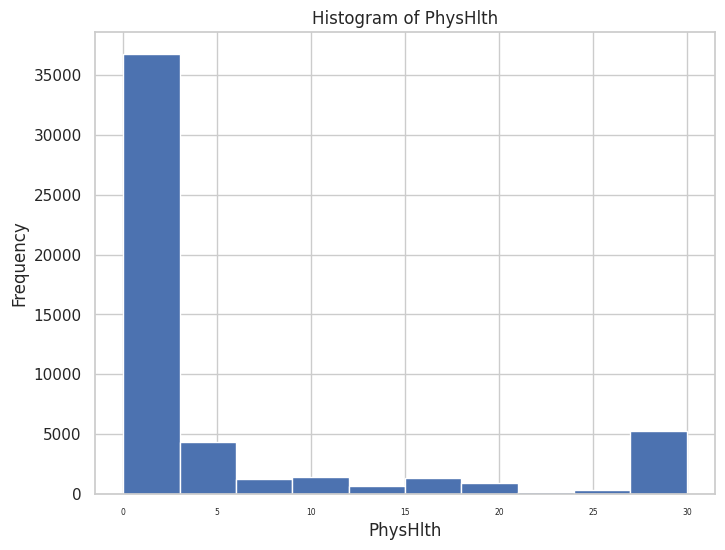

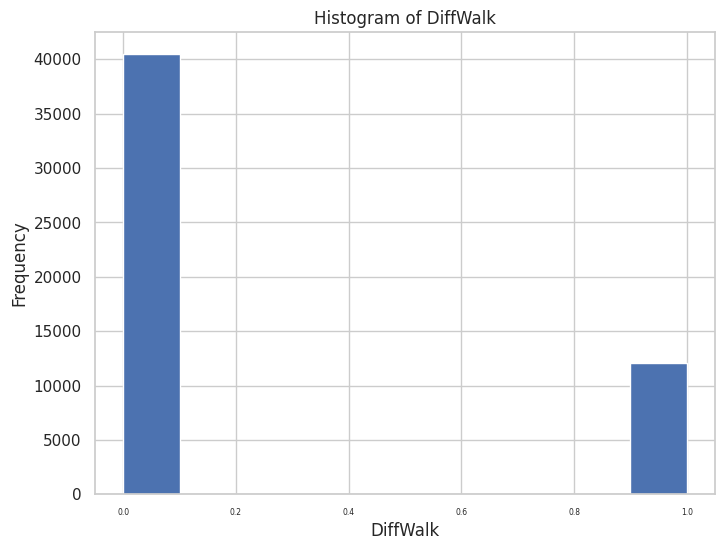

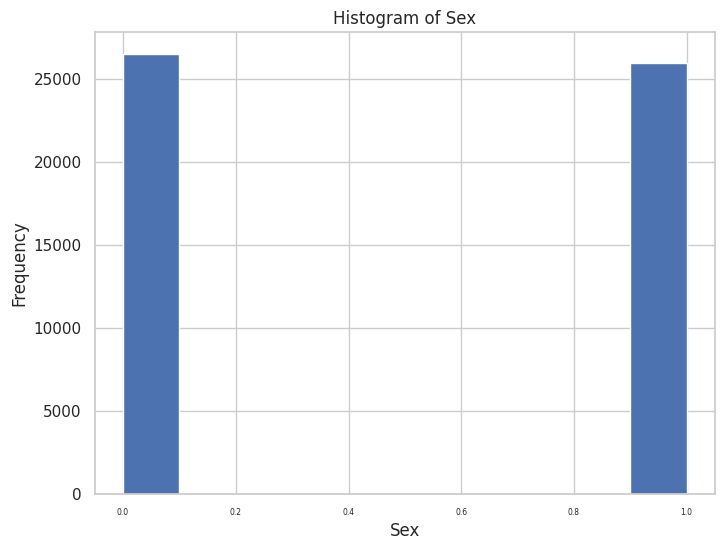

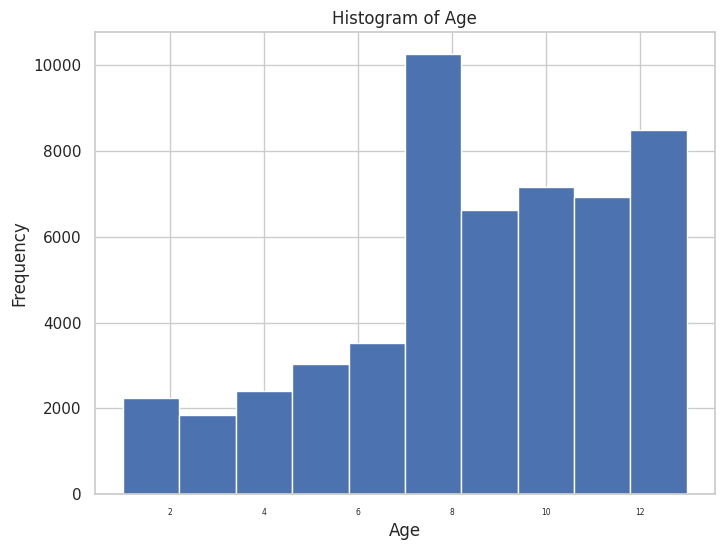

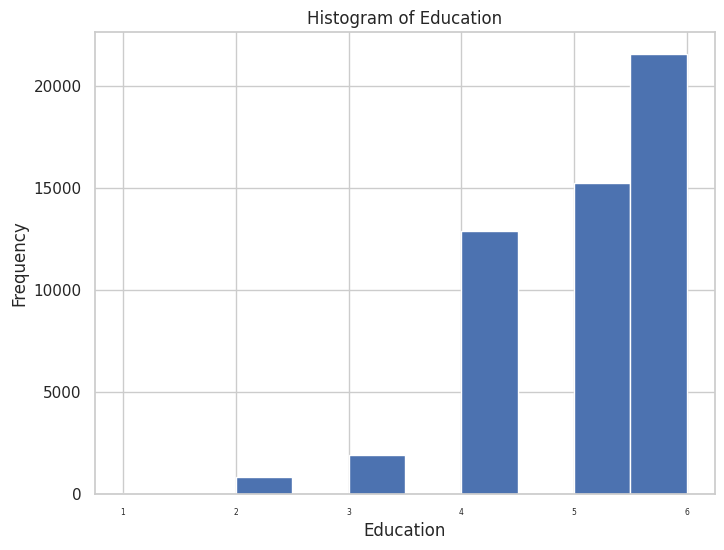

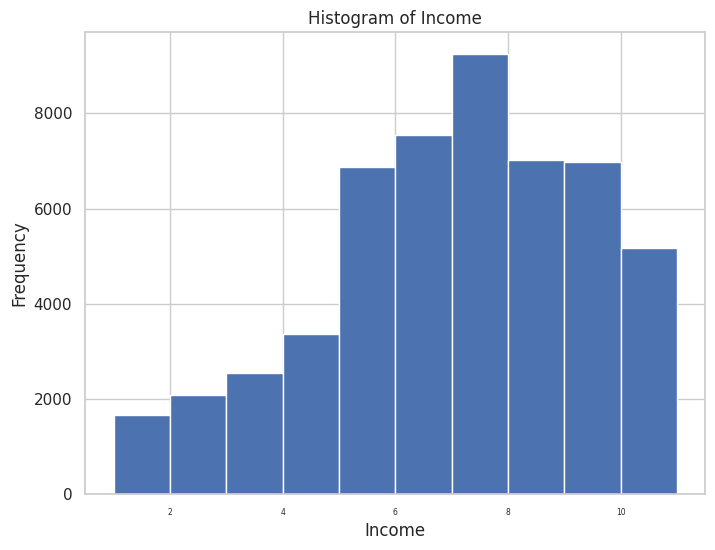

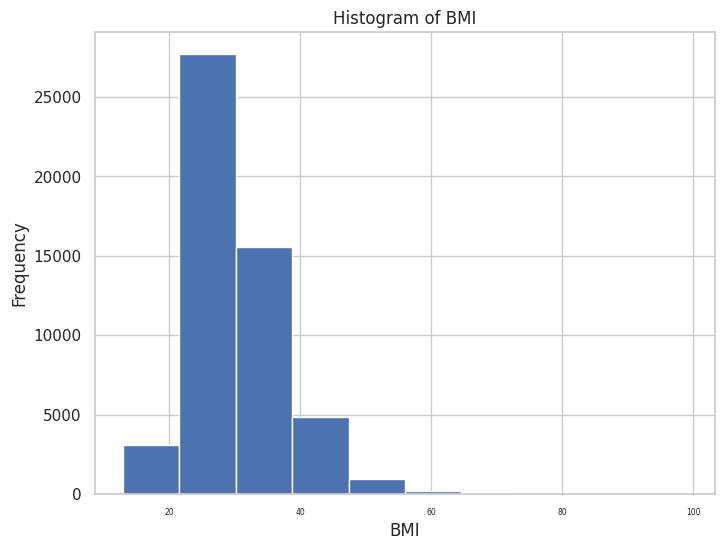

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Escludi la colonna 'diabetes_binary' dalla lista delle colonne
feature_columns = [col for col in data_preprocessed.columns if col != 'Diabetes_binary']

# Crea istogrammi per ogni feature escludendo 'diabetes_binary'
for column in feature_columns:
    plt.figure(figsize=(8, 6))
    data_preprocessed[column].hist(bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


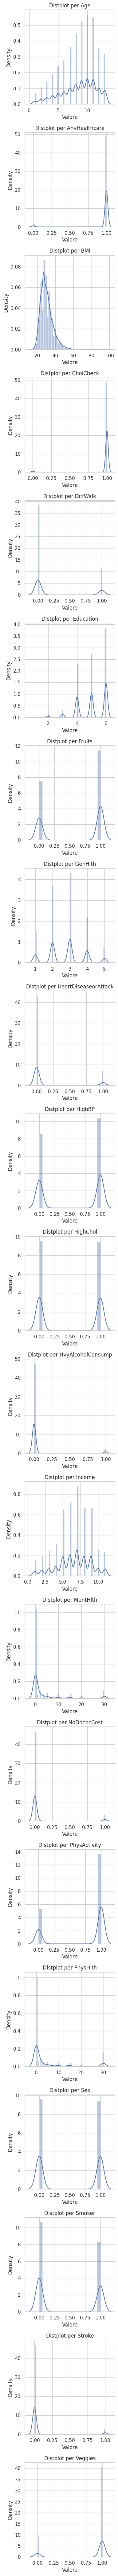

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Selezionare solo le colonne delle feature (escludendo la colonna target)
feature_columns = data_preprocessed.columns.difference(['Diabetes_binary'])
df_features = data_preprocessed[feature_columns]

# Impostare lo stile di seaborn (opzionale)
sns.set(style="whitegrid")

# Creare subplot separati per ciascuna feature
plt.figure(figsize=(4, 4 * len(feature_columns)))

for i, col in enumerate(df_features.columns, 1):
    plt.subplot(len(feature_columns), 1, i)
    sns.distplot(df_features[col], kde=True)
    plt.title(f'Distplot per {col}')
    plt.xlabel('Valore')

plt.tight_layout()
plt.show()



Dai risultati ottenuti si osserva globalmente distribuzioni Gaussiane bimodali, e multimodali eccezione fatta per il BMI che è l'unico a presentare una distribuzione unimodale.

Diabetes_binary  Age 
0.0              1.0      799
                 2.0     1194
                 3.0     1570
                 4.0     1889
                 5.0     2107
                 6.0     2141
                 7.0     2413
                 8.0     2634
                 9.0     2826
                 10.0    2876
                 11.0    2561
                 12.0    1617
                 13.0    1637
1.0              1.0       82
                 2.0      166
                 3.0      285
                 4.0      510
                 5.0      931
                 6.0     1374
                 7.0     2181
                 8.0     3024
                 9.0     3807
                 10.0    4277
                 11.0    4362
                 12.0    2881
                 13.0    2352
dtype: int64
Diabetes_binary  PhysActivity
0.0              0.0              5131
                 1.0             21133
1.0              0.0              9652
                 1.0             16580

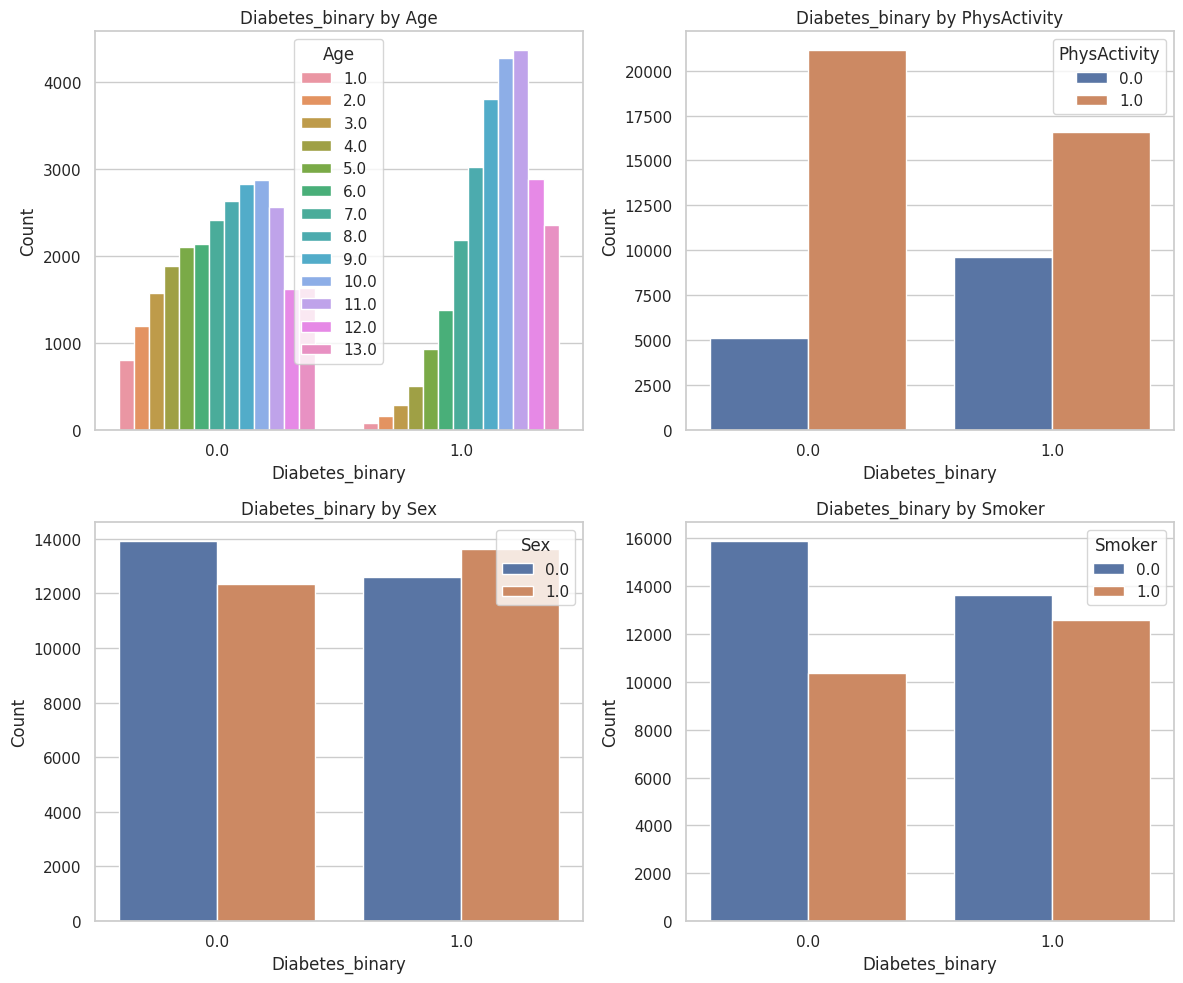

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(x='Diabetes_binary', hue='Age', data=data_preprocessed, ax=axes[0, 0])
axes[0, 0].set_title('Diabetes_binary by Age')
axes[0, 0].set_xlabel('Diabetes_binary')
axes[0, 0].set_ylabel('Count')
print(data_preprocessed.groupby(['Diabetes_binary', 'Age']).size())

sns.countplot(x='Diabetes_binary', hue='PhysActivity', data=data_preprocessed, ax=axes[0, 1])
axes[0, 1].set_title('Diabetes_binary by PhysActivity')
axes[0, 1].set_xlabel('Diabetes_binary')
axes[0, 1].set_ylabel('Count')
print(data_preprocessed.groupby(['Diabetes_binary', 'PhysActivity']).size())

sns.countplot(x='Diabetes_binary', hue='Sex', data=data_preprocessed, ax=axes[1, 0])
axes[1, 0].set_title('Diabetes_binary by Sex')
axes[1, 0].set_xlabel('Diabetes_binary')
axes[1, 0].set_ylabel('Count')
print(data_preprocessed.groupby(['Diabetes_binary', 'Sex']).size())

sns.countplot(x='Diabetes_binary', hue='Smoker', data=data_preprocessed, ax=axes[1, 1])
axes[1, 1].set_title('Diabetes_binary by Smoker')
axes[1, 1].set_xlabel('Diabetes_binary')
axes[1, 1].set_ylabel('Count')
print(data_preprocessed.groupby(['Diabetes_binary', 'Smoker']).size())

plt.tight_layout()
plt.show()

Dai seguenti grafici invece si può evincere come le fasce più colpite siano quelle delle persone più anziane, ed in particolare c'è una lieve maggioranza di soggetti affetti da diabete di sesso maschile rispetto a quelli femminili. Si osserva inoltre come i soggetti non affetti da diabete siano quelli che praticano attività fisica e non fumano

**Matrice di correlazione**

Con il termine correlazione si fa riferimento alla covarianza normalizzata a [-1,1] in modo da non dipendere dai dati e dalla scala dei dati stessi. In particolare, questa permette di descrivere la relazione lineare tra due variabili. Per visualizzare graficamente la correlazione si utilizza la matrice di correlazione: tanto più il colore tende a una tonalità fredda, tanto più la correlazione è negativa e viceversa.

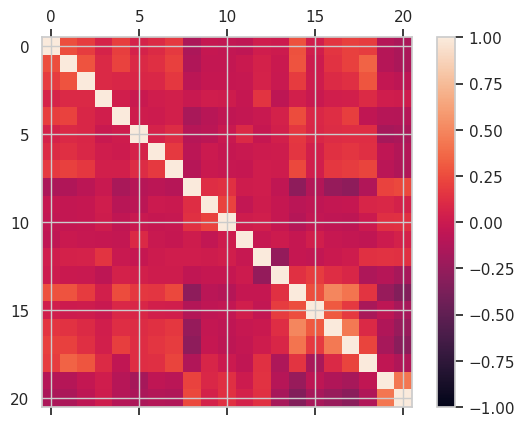

In [ ]:
#Correlation Matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

Potrei pensare di rimuovere le colonne che hanno scarsa correlazione con la feature target in qunato poco significative

In [ ]:
correlation_matrix = data_preprocessed.corr()
target_correlation = correlation_matrix['Diabetes_binary'].abs().sort_values(ascending=False)
target_correlation



Diabetes_binary         1.000000
GenHlth                 0.384546
HighBP                  0.372685
Age                     0.291528
HighChol                0.280099
BMI                     0.264835
DiffWalk                0.256915
Income                  0.214360
HeartDiseaseorAttack    0.209739
PhysHlth                0.199597
PhysActivity            0.191855
Education               0.146034
CholCheck               0.122194
Stroke                  0.121565
HvyAlcoholConsump       0.093711
Smoker                  0.085168
Veggies                 0.060086
MentHlth                0.051560
Sex                     0.049067
AnyHealthcare           0.042587
Fruits                  0.034885
NoDocbcCost             0.018638
Name: Diabetes_binary, dtype: float64

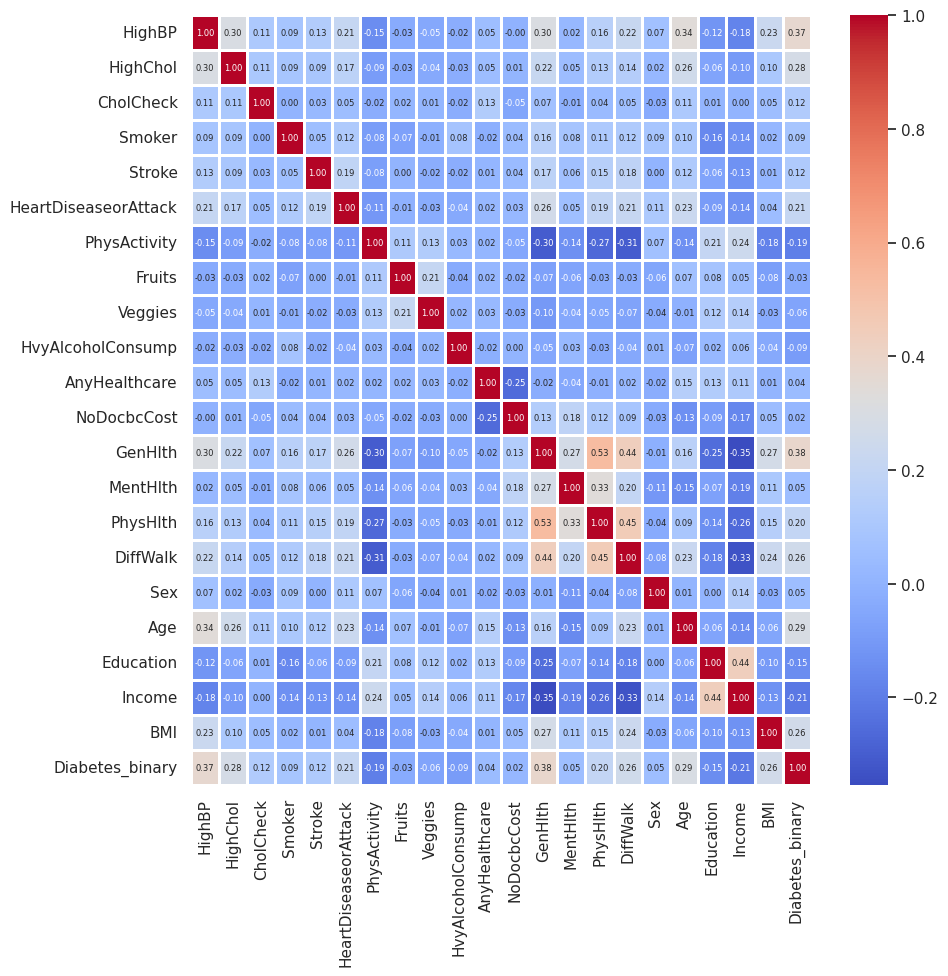

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

correlation_matrix = data_preprocessed.corr()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 6}, linewidths=2)
plt.show()


TEST SET VISUALIZZAZIONE E PREPROCESSING

In [ ]:
datatest=pd.read_csv('https://raw.githubusercontent.com/luigiscalisi/datamining/main/diabetes_test.csv')


names=["Diabetes_012", "HighBP", "HighChol", "CholCheck", "BMI","Smoker" ,"Stroke" ,"HeartDiseaseorAttack"  ,"PhysActivity" ,"Fruits" ,"Veggies","HvyAlcoholConsump" ,"AnyHealthcare" ,"NoDocbcCost" ,"GenHlth" , "MentHlth" ,"PhysHlth" ,"DiffWalk" ,"Sex","Age","Education","Income"]

datatest

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0               0.0       0       0.0          1  29.0     1.0     0.0   
1               0.0       1       0.0          1  42.0     1.0     0.0   
2               0.0       1       1.0          1  31.0     1.0     1.0   
3               2.0       1       1.0          1  38.0     0.0     0.0   
4               0.0       0       0.0          1  28.0     0.0     0.0   
...             ...     ...       ...        ...   ...     ...     ...   
47271           0.0       0       0.0          1  22.0     0.0     0.0   
47272           0.0       1       1.0          1  28.0     1.0     0.0   
47273           0.0       0       1.0          1  21.0     0.0     0.0   
47274           0.0       0       0.0          1  24.0     0.0     0.0   
47275           2.0       1       1.0          1  26.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                       0.0             1       0  ...              1   
1                       0.0             0       0  ...              1   
2                       0.0             1       1  ...              1   
3                       0.0             0       1  ...              1   
4                       0.0             0       1  ...              1   
...                     ...           ...     ...  ...            ...   
47271                   0.0             1       1  ...              1   
47272                   0.0             0       0  ...              1   
47273                   0.0             1       1  ...              1   
47274                   0.0             0       0  ...              0   
47275                   0.0             0       1  ...              1   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  \
0              0.0      2.0       2.0       0.0       0.0    0    4   
1              0.0      4.0      30.0      30.0       1.0    0    9   
2              0.0      1.0       0.0       5.0       0.0    0   10   
3              0.0      3.0       0.0       0.0       0.0    0    4   
4              0.0      3.0       0.0       0.0       0.0    1    7   
...            ...      ...       ...       ...       ...  ...  ...   
47271          0.0      1.0       0.0       0.0       0.0    0    5   
47272          0.0      3.0       1.0       0.0       1.0    0   12   
47273          0.0      1.0       4.0       4.0       0.0    0   10   
47274          0.0      3.0       0.0       0.0       0.0    1    1   
47275          0.0      3.0       0.0      20.0       0.0    1   10   

       Education  Income  
0            6.0     9.0  
1            4.0     2.0  
2            6.0     3.0  
3            4.0     5.0  
4            5.0     9.0  
...          ...     ...  
47271        6.0    11.0  
47272        3.0     4.0  
47273        6.0    11.0  
47274        3.0     5.0  
47275        4.0     8.0  

[47276 rows x 22 columns]

In [ ]:
brfss_binario = datatest

brfss_binario['Diabetes_012'] = brfss_binario['Diabetes_012'].replace({1:0})
brfss_binario['Diabetes_012'] = brfss_binario['Diabetes_012'].replace({2:1})

#Binarizzo la feature target
brfss_binario = brfss_binario.rename(columns = {'Diabetes_012': 'Diabetes_binary'})
brfss_binario.groupby(['Diabetes_binary']).size()

Diabetes_binary
0.0    40471
1.0     6805
dtype: int64

In [ ]:

data_testing=brfss_binario

In [ ]:
data_testing['Sex'] = data_testing['Sex'].replace({'Male': 1, 'Female': 0})
data_testing["Sex"] = pd.to_numeric(data_testing["Sex"], errors="coerce")
data_testing['Sex'] = data_testing['Sex'].replace({'M': 1, 'F': 0})
data_testing["Sex"] = pd.to_numeric(data_testing["Sex"], errors="coerce")
data_testing['Sex'].unique()

array([0, 1])

In [ ]:
data_testing.groupby(['Diabetes_binary']).size()

Diabetes_binary
0.0    40471
1.0     6805
dtype: int64

In [ ]:
data_testing=data_testing.dropna()
data_testing

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                  0.0       0       0.0          1  29.0     1.0     0.0   
1                  0.0       1       0.0          1  42.0     1.0     0.0   
2                  0.0       1       1.0          1  31.0     1.0     1.0   
3                  1.0       1       1.0          1  38.0     0.0     0.0   
4                  0.0       0       0.0          1  28.0     0.0     0.0   
...                ...     ...       ...        ...   ...     ...     ...   
47271              0.0       0       0.0          1  22.0     0.0     0.0   
47272              0.0       1       1.0          1  28.0     1.0     0.0   
47273              0.0       0       1.0          1  21.0     0.0     0.0   
47274              0.0       0       0.0          1  24.0     0.0     0.0   
47275              1.0       1       1.0          1  26.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                       0.0             1       0  ...              1   
1                       0.0             0       0  ...              1   
2                       0.0             1       1  ...              1   
3                       0.0             0       1  ...              1   
4                       0.0             0       1  ...              1   
...                     ...           ...     ...  ...            ...   
47271                   0.0             1       1  ...              1   
47272                   0.0             0       0  ...              1   
47273                   0.0             1       1  ...              1   
47274                   0.0             0       0  ...              0   
47275                   0.0             0       1  ...              1   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  \
0              0.0      2.0       2.0       0.0       0.0    0    4   
1              0.0      4.0      30.0      30.0       1.0    0    9   
2              0.0      1.0       0.0       5.0       0.0    0   10   
3              0.0      3.0       0.0       0.0       0.0    0    4   
4              0.0      3.0       0.0       0.0       0.0    1    7   
...            ...      ...       ...       ...       ...  ...  ...   
47271          0.0      1.0       0.0       0.0       0.0    0    5   
47272          0.0      3.0       1.0       0.0       1.0    0   12   
47273          0.0      1.0       4.0       4.0       0.0    0   10   
47274          0.0      3.0       0.0       0.0       0.0    1    1   
47275          0.0      3.0       0.0      20.0       0.0    1   10   

       Education  Income  
0            6.0     9.0  
1            4.0     2.0  
2            6.0     3.0  
3            4.0     5.0  
4            5.0     9.0  
...          ...     ...  
47271        6.0    11.0  
47272        3.0     4.0  
47273        6.0    11.0  
47274        3.0     5.0  
47275        4.0     8.0  

[47276 rows x 22 columns]

**Definizione del training set e test set**



In [ ]:
data_trainred = data_preprocessed
data_testred = data_testing
column_order = data_trainred.columns

# Riorganizzare le colonne del dataset di test nello stesso ordine di quello di train
data_testred = data_testred[column_order]
testing_x = data_testred.drop("Diabetes_binary", axis = 1).values
testing_y = data_testred["Diabetes_binary"].values
data_trainred

HighBP  HighChol  CholCheck  Smoker  Stroke  HeartDiseaseorAttack  \
0         0.0       0.0        1.0     0.0     0.0                   0.0   
1         0.0       0.0        1.0     1.0     0.0                   1.0   
2         0.0       0.0        1.0     1.0     0.0                   0.0   
3         0.0       0.0        1.0     0.0     0.0                   0.0   
4         1.0       1.0        1.0     0.0     0.0                   1.0   
...       ...       ...        ...     ...     ...                   ...   
53521     0.0       0.0        1.0     0.0     1.0                   1.0   
53522     0.0       1.0        1.0     0.0     0.0                   0.0   
53523     1.0       1.0        1.0     1.0     1.0                   1.0   
53524     1.0       0.0        1.0     0.0     0.0                   1.0   
53525     0.0       0.0        1.0     0.0     0.0                   0.0   

       PhysActivity  Fruits  Veggies  HvyAlcoholConsump  ...  GenHlth  \
0               0.0     0.0      1.0                0.0  ...      1.0   
1               0.0     0.0      0.0                0.0  ...      2.0   
2               0.0     0.0      0.0                0.0  ...      3.0   
3               0.0     1.0      1.0                0.0  ...      3.0   
4               1.0     0.0      0.0                0.0  ...      2.0   
...             ...     ...      ...                ...  ...      ...   
53521           0.0     1.0      1.0                0.0  ...      4.0   
53522           1.0     1.0      1.0                0.0  ...      3.0   
53523           1.0     1.0      1.0                0.0  ...      4.0   
53524           0.0     0.0      0.0                0.0  ...      2.0   
53525           1.0     1.0      1.0                0.0  ...      3.0   

       MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income   BMI  \
0           0.0       0.0       0.0  0.0  11.0        6.0     9.0  33.0   
1           0.0       0.0       0.0  1.0   7.0        6.0     9.0  23.0   
2          15.0       0.0       0.0  1.0   3.0        3.0     5.0  21.0   
3          10.0      20.0       0.0  0.0   7.0        4.0     7.0  27.0   
4           0.0       0.0       0.0  1.0  11.0        6.0     7.0  32.0   
...         ...       ...       ...  ...   ...        ...     ...   ...   
53521       0.0       0.0       1.0  1.0   9.0        3.0     5.0  31.0   
53522       4.0       2.0       0.0  0.0  11.0        6.0     5.0  39.0   
53523       0.0      30.0       1.0  1.0   7.0        5.0     5.0  22.0   
53524      30.0       0.0       0.0  1.0  11.0        5.0     5.0  32.0   
53525       0.0       0.0       0.0  1.0   9.0        6.0     8.0  29.0   

       Diabetes_binary  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
...                ...  
53521              1.0  
53522              1.0  
53523              1.0  
53524              1.0  
53525              1.0  

[52442 rows x 22 columns]

Dividiamo il dataset in due parti, il 70% (train set) sarà utilizzato per addestrare gli algoritmi e il restante 30% (test set) che, invece, sarà usato come set di convalida. In questo modo si useranno dati che gli algoritmi non potranno vedere in modo da avere un'idea di quanto accurato possa effettivamente essere il modello migliore.





In [ ]:
X = data_trainred.drop("Diabetes_binary", axis = 1).values
Y = data_trainred["Diabetes_binary"].values
validation_size = 0.30
seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed) #test_size è la percentuale di rapresentanza del test set


**3. VALUTAZIONE DEGLI ALGORITMI DI CLASSIFICAZIONE**

In questo caso non è noto a priori quale algoritmo di classificazione sia il miglore da usare. Si effettua una valutazione di sei differenti algoritmi:

*  Logistic Regression (LR).
*  Linear Discriminant Analysis (LDA).
*  k-Nearest Neighbors (KNN).
*  Classification and Regression Trees (CART).
*  Gaussian Naive Bayes (NB).
*  Support Vector Machines (SVM).



Inoltre è stata eseguita una modalità di convalida incrociata (K-Fold Cross Validation): a partire dal train set si suddivide il dataset in un numero standard di sottoinsiemi (10 in questo caso) e si addestra iterativamente lo stesso algoritmo su partizioni del dataset diverse.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state= None)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


LR: 0.736224 (0.007254)
LDA: 0.740142 (0.005993)
KNN: 0.684791 (0.009248)
CART: 0.641114 (0.006401)
NB: 0.720413 (0.005353)
SVM: 0.741095 (0.007844)


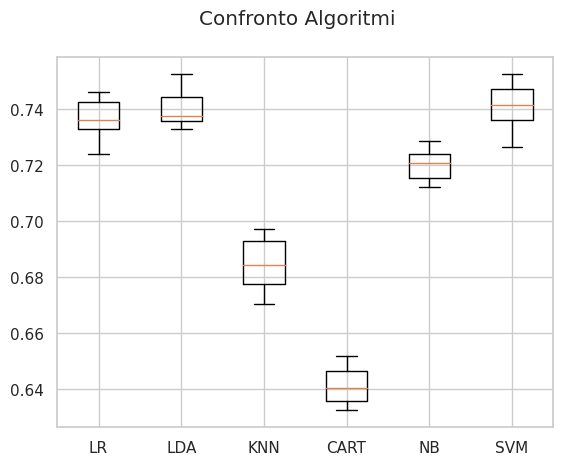

In [ ]:
# Confronto algortimi
fig = pyplot.figure()
fig.suptitle('Confronto Algoritmi')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.grid("True")
pyplot.show()

Noto come tutti i modelli abbiano prestazioni piuttosto simili in particolare Regressione Logistica e LDA risultano i migliori così come SVM che però impiega leggermente più tempo per fornire un output.

**4. Modellazione mediante l'algoritmo di Regressione Logistica (LR)**

Accuracy score 0.7366181979808242
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73      7863
         1.0       0.73      0.76      0.74      7886

    accuracy                           0.74     15749
   macro avg       0.74      0.74      0.74     15749
weighted avg       0.74      0.74      0.74     15749



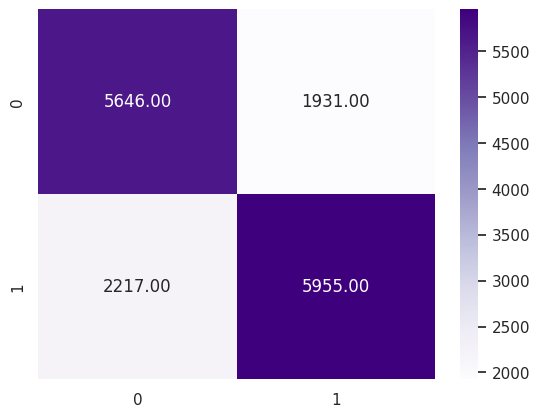

In [ ]:
# Predizione sul test set
lg = LogisticRegression()
lg.fit(X_train, y_train)
predictions = lg.predict(X_test)
cf_matrix = confusion_matrix(predictions, y_test)
sb.heatmap(cf_matrix, annot = True, fmt=".2f", cmap='Purples')
print("Accuracy score",accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Viene visualizzata in output anche la matrice di confusione che permette di stabilire la percentuale di errore di classificazione e analizzare
se il risultato è stato predetto correttamente o meno. Gli elementi sulla diagonale rappresentano il
numero di punti per i quali l'etichetta prevista è uguale alla vera etichetta, mentre gli elementi fuori
diagonale sono quelli che sono etichettati erroneamente dal classificatore.

L'utilizzo di LR è risultato vantaggioso in quanto era stata registrata un'accuratezza di circa 73%.
Da quest'ultima matrice è evidente che circa 5650 sono i True Positive e circa 5955 i True Negative, mentre 2217 e 1931 sono rispettivamente i False Negative e i False Positive.

**Curve ROC**

La curva ROC (Receiver Operating Characteristic) è un grafico che mette in relazione la sensibilità (asse y) e la specificità (asse x), importante nei test di diagnostica. Infatti, il test diagnostico dipende da un valore soglia (cut-off) che permette di discriminare nel modo più accurato i soggetti malati. Nel caso del dataset analizzato, permette di discriminare tra i soggetti affetti o meno dal diabete. Lo scopo è quello di valutare le prestazioni dell'algoritmo sulla base del cut-off.
In genere oltre alla curva si rappresenta anche la diagonale che indica un classificatore che classifica in modo random. Questa condizione è la condizione base per accettare o meno l'autenticità dell'algoritmo di classificazione.
Più è alta la curva rispetto alla diagonale, tanto più corrette sono le prestazioni dell'algoritmo.


Un'altra misura da poter effettuare è il calcolo dell'area sottesa dalla curva AUC (Area Under the Curve), dove la massima area è quella del quadrato di lato 1.


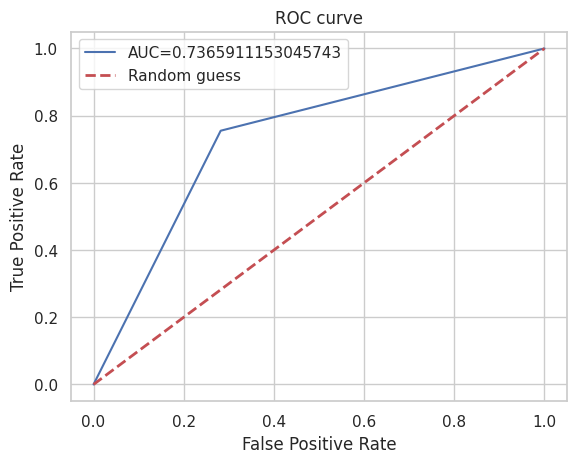

In [ ]:
#Creazione curva ROC e calcolo AUC
fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
auc = metrics.roc_auc_score(y_test, predictions)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid("True")
plt.legend()
plt.show()

**Curve di apprendimento**

Una curva di apprendimento, nel contesto del machine learning, è un grafico che mostra come il modello si comporta in termini di prestazioni (solitamente l'errore o l'accuratezza) al variare della quantità di dati di addestramento utilizzati. La curva di apprendimento è una visualizzazione utile per comprendere come le prestazioni del modello migliorano o peggiorano in relazione alla quantità di dati forniti per l'addestramento.



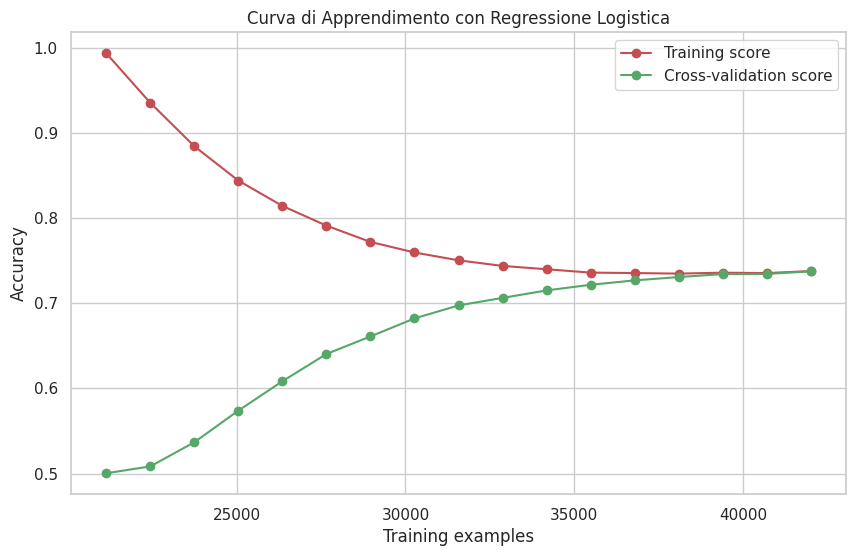

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

X_train = data_trainred.drop('Diabetes_binary', axis=1)  # 'target_column' rappresenta la colonna target
y_train = data_trainred['Diabetes_binary']
X_test = data_testred.drop('Diabetes_binary', axis=1)
y_test = data_testred['Diabetes_binary']

#np.random.seed(42)


# Inizializza il modello di regressione logistica
model = LogisticRegression()

# Crea la curva di apprendimento
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train , y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 30), scoring="accuracy")

# Calcola la media delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Crea il plot della curva di apprendimento
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.title("Curva di Apprendimento con Regressione Logistica")
plt.show()



In un modello underfitted con un elevato bias, i valori elevati di errore causano una convergenza al di sotto del grado di accuratezza desiderato. L'aggiunta di dati di training in un modello underfitted non è di grande aiuto. In un modello overfitted  i valori  di errore/accuratezza del campione di validazione e del campione di addestramento non riescono a convergere.

**Confini Decisionali**

Viene implementata una funzione per rappresentare il confine decisionale. Una superficie decisionale o confine decisionale fornisce uno strumento diagnostico per comprendere come un dato modello visualizza la previsione. Fornisce inoltre un modo rapido per identificare le aree in cui il modello si adatta troppo o meno ai dati.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np

df_encoded = pd.get_dummies(data_trainred.drop('Diabetes_binary', axis=1))

# Concatenazione delle features codificate con la colonna target
df_encoded['Diabetes_binary'] = data_trainred['Diabetes_binary']

# Seleziona solo due features
selected_features = ['BMI', 'Income']  # Sostituisci con le tue due features di interesse

# Divide il dataset in training e test utilizzando solo le due features selezionate
X_train, X_test, y_train, y_test = train_test_split(df_encoded[selected_features], df_encoded['Diabetes_binary'], test_size=0.3, random_state=42)

# Addestramento del modello
model = LogisticRegression()
model.fit(X_train, y_train)

# Creazione di una meshgrid per visualizzare i confini decisionali
xx, yy = np.meshgrid(np.linspace(X_train.iloc[:, 0].min(), X_train.iloc[:, 0].max(), 100),
                     np.linspace(X_train.iloc[:, 1].min(), X_train.iloc[:, 1].max(), 100))

# Visualizzazione dei confini decisionali
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='coolwarm',marker='o', edgecolors='k')
plt.contourf(xx, yy, model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), alpha=0.3, cmap='coolwarm')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title('Confini decisionali Regressione Logistica')
plt.show()


In questo caso, come anche negli algoritmi analizzati successivamente, si osserva che il plot dei confini decisionali non è agevole. Questo a causa dell'assenza di dati puramente qualitativi che avrebbero dato luogo ad una dispersione più varia dei punti. Ci si è trovati quindi costretti ad impiegare le uniche feature non totalmente binarie come il BMI e il reddito (INCOME).

**5. Modellazione mediante l'algoritmo Linear Discriminant Analysis (LDA)**

In [ ]:
X = data_trainred.drop("Diabetes_binary", axis = 1).values
Y = data_trainred["Diabetes_binary"].values
validation_size = 0.30
seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
predictions = lda.predict(X_test)
cf_matrix = confusion_matrix(predictions, y_test)
sb.heatmap(cf_matrix, annot = True, fmt=".2f", cmap='Purples')
print("Accuracy score",accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy score 0.7398564988253222
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73      7863
         1.0       0.73      0.76      0.75      7886

    accuracy                           0.74     15749
   macro avg       0.74      0.74      0.74     15749
weighted avg       0.74      0.74      0.74     15749



Con questo modello osserviamo una accurartezza molto simile  al caso precedente ed un leggero aumento di true positive e diminuizione dei false negative.

Visualizziamo anche per questo modello la curva ROC e il valore di area sotto la curva (AUC). Notiamo un valore di AUC di 0.74.

In [ ]:
#Creazione curva ROC e calcolo AUC
fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
auc = metrics.roc_auc_score(y_test, predictions)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid("True")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train = data_trainred.drop('Diabetes_binary', axis=1)  # 'target_column' rappresenta la colonna target
y_train = data_trainred['Diabetes_binary']
X_test = data_testred.drop('Diabetes_binary', axis=1)
y_test = data_testred['Diabetes_binary']


#np.random.seed(42)


# Inizializza il modello di regressione
model = LinearDiscriminantAnalysis()
# Crea la curva di apprendimento
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train , y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 30), scoring = 'accuracy')

# Calcola la media delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Crea il plot della curva di apprendimento
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.title("Curva di Apprendimento con LDA")
plt.show()


Mostro anche in questo caso i confini decisionali ottenuti usando LDA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np

df_encoded = pd.get_dummies(data_trainred.drop('Diabetes_binary', axis=1))

# Concatenazione delle features codificate con la colonna target
df_encoded['Diabetes_binary'] = data_trainred['Diabetes_binary']

# Seleziona solo due features
selected_features = ['BMI', 'Income']  # Sostituisci con le tue due features di interesse

# Divide il dataset in training e test utilizzando solo le due features selezionate
X_train, X_test, y_train, y_test = train_test_split(df_encoded[selected_features], df_encoded['Diabetes_binary'], test_size=0.3, random_state=42)

# Addestramento del modello SVM
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

# Creazione di una meshgrid per visualizzare i confini decisionali
xx, yy = np.meshgrid(np.linspace(X_train.iloc[:, 0].min(), X_train.iloc[:, 0].max(), 100),
                     np.linspace(X_train.iloc[:, 1].min(), X_train.iloc[:, 1].max(), 100))

# Visualizzazione dei confini decisionali
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='coolwarm',marker='o', edgecolors='k')
plt.contourf(xx, yy, model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), alpha=0.3, cmap='coolwarm')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title('Confini decisionali LDA')
plt.show()

**6. Modellazione mediante l'algoritmo Support Vector Machine (SVM)**

Accuracy score 0.7388405613054797
              precision    recall  f1-score   support

         0.0       0.77      0.69      0.72      7863
         1.0       0.72      0.79      0.75      7886

    accuracy                           0.74     15749
   macro avg       0.74      0.74      0.74     15749
weighted avg       0.74      0.74      0.74     15749



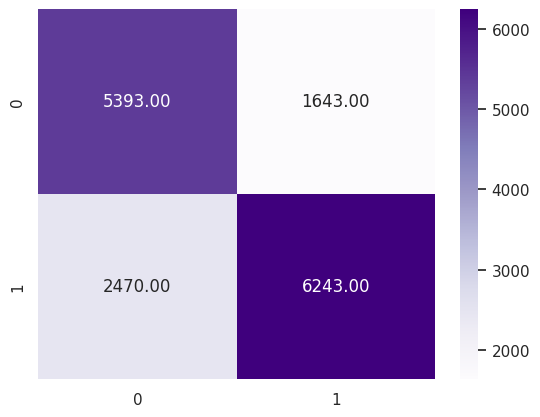

In [ ]:
X = data_trainred.drop("Diabetes_binary", axis = 1).values
Y = data_trainred["Diabetes_binary"].values
validation_size = 0.30
seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)
svm = SVC()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
cf_matrix = confusion_matrix(predictions, y_test)
sb.heatmap(cf_matrix, annot = True, fmt=".2f", cmap='Purples')
print("Accuracy score",accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


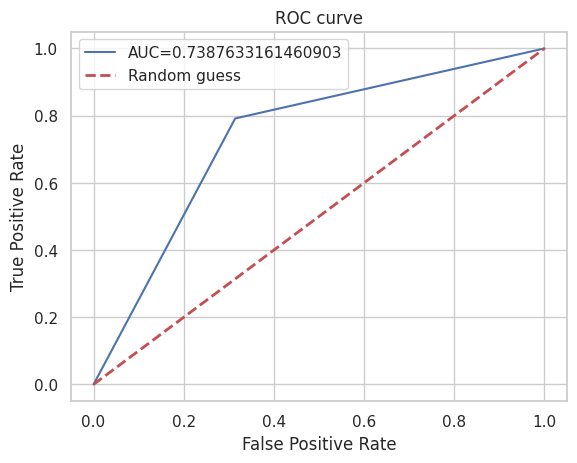

In [ ]:
#Creazione curva ROC e calcolo AUC
fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
auc = metrics.roc_auc_score(y_test, predictions)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid("True")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

#np.random.seed(42)
X_train = data_trainred.drop('Diabetes_binary', axis=1)  # 'target_column' rappresenta la colonna target
y_train = data_trainred['Diabetes_binary']

# Inizializza il modello SVM
model = SVC()
# Crea la curva di apprendimento
train_sizes, train_scores, test_scores = learning_curve(model, X_train , y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring="accuracy")

# Calcola la media delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Crea il plot della curva di apprendimento
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.title("Curva di Apprendimento con SVM")
plt.show()


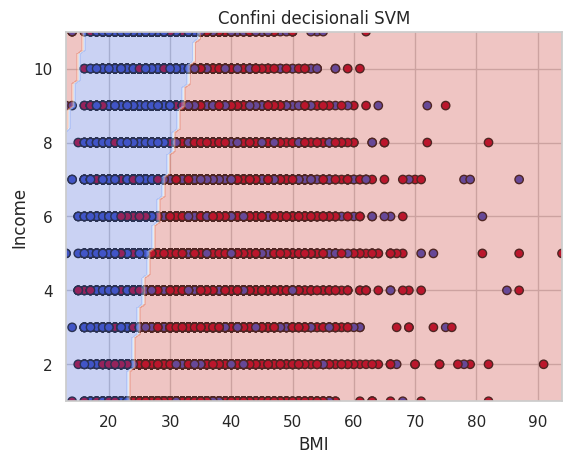

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np

df_encoded = pd.get_dummies(data_trainred.drop('Diabetes_binary', axis=1))

# Concatenazione delle features codificate con la colonna target
df_encoded['Diabetes_binary'] = data_trainred['Diabetes_binary']

# Seleziona solo due features
selected_features = ['BMI', 'Income']  # Sostituisci con le tue due features di interesse

# Divide il dataset in training e test utilizzando solo le due features selezionate
X_train, X_test, y_train, y_test = train_test_split(df_encoded[selected_features], df_encoded['Diabetes_binary'], test_size=0.3, random_state=42)

# Addestramento del modello SVM
model = SVC()
model.fit(X_train, y_train)

# Creazione di una meshgrid per visualizzare i confini decisionali
xx, yy = np.meshgrid(np.linspace(X_train.iloc[:, 0].min(), X_train.iloc[:, 0].max(), 100),
                     np.linspace(X_train.iloc[:, 1].min(), X_train.iloc[:, 1].max(), 100))

# Visualizzazione dei confini decisionali
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='coolwarm',marker='o', edgecolors='k')
plt.contourf(xx, yy, model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), alpha=0.3, cmap='coolwarm')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title('Confini decisionali SVM')
plt.show()


**Salvataggio del modello e valutazione sul test set.**

In [ ]:
X_testing = data_testred.drop('Diabetes_binary', axis=1)
y_testing = data_testred['Diabetes_binary']


In [ ]:
# Save Model Using joblib
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from joblib import dump
from joblib import load
X = data_trainred.drop("Diabetes_binary", axis = 1).values
Y = data_trainred["Diabetes_binary"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=7)
# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)
#save the model to disk
filename = 'model_LR.sav'
dump(model, filename)
# some time later...
# load the model from disk
loaded_model = load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

0.7323004635214935


 Salviamo il modello migliore cioè regressione logistica (LR), lo carichiamo e lo valutiamo sul secondo file

In [ ]:
from joblib import dump
from joblib import load
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#Salviamo best_model (vedi sopra) su disco
filename = 'model_LR.sav'
dump(model, filename)
# some time later...
# load del modello da disco
loaded_model = load(filename)
# Load dataset eval

X_testing = data_testred.drop('Diabetes_binary', axis=1)
y_testing = data_testred['Diabetes_binary']

predictions = loaded_model.predict(X_testing)
print('Accuratezza Finale:', accuracy_score(y_testing, predictions))
cf_matrix = confusion_matrix(predictions, y_testing)
sb.heatmap(cf_matrix, annot = True, fmt=".2f", cmap='Purples')
#print('Matrice di confusione',confusion_matrix(y_testing, predictions))
print('Report', classification_report(y_testing,predictions))

Accuratezza Finale: 0.7222692275150182
Report               precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     40471
         1.0       0.31      0.76      0.44      6805

    accuracy                           0.72     47276
   macro avg       0.63      0.74      0.63     47276
weighted avg       0.86      0.72      0.76     47276



Testiamo ora sui dati di test il modello basato su LDA

In [ ]:
# Save Model Using joblib
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from joblib import dump
from joblib import load
X = data_trainred.drop("Diabetes_binary", axis = 1).values
Y = data_trainred["Diabetes_binary"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=7)
# Fit the model on 33%
modello = LinearDiscriminantAnalysis()
modello.fit(X_train, Y_train)
#save the model to disk
filename = 'model_lda.sav'
dump(modello, filename)
# some time later...
# load the model from disk
loaded_model = load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

0.7368721823607848


In [ ]:
from joblib import dump
from joblib import load
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#Salviamo best_model (vedi sopra) su disco
filename = 'model_lda.sav'
dump(modello, filename)
# some time later...
# load del modello da disco
loaded_model = load(filename)
# Load dataset eval

X_testing = data_testred.drop('Diabetes_binary', axis=1)
y_testing = data_testred['Diabetes_binary']

predictions = loaded_model.predict(X_testing)
print('Accuratezza Finale:', accuracy_score(y_testing, predictions))
cf_matrix = confusion_matrix(predictions, y_testing)
sb.heatmap(cf_matrix, annot = True, fmt=".2f", cmap='Purples')
#print('Matrice di confusione',confusion_matrix(y_testing, predictions))
print('Report', classification_report(y_testing,predictions))

Accuratezza Finale: 0.7208731703189779
Report               precision    recall  f1-score   support

         0.0       0.95      0.71      0.81     40471
         1.0       0.31      0.78      0.45      6805

    accuracy                           0.72     47276
   macro avg       0.63      0.74      0.63     47276
weighted avg       0.86      0.72      0.76     47276



Infine testiamo l'ultimo modello (SVM) che aveva dato accuratezza maggiore sul test set.

In [ ]:
# Save Model Using joblib
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from joblib import dump
from joblib import load
X = data_trainred.drop("Diabetes_binary", axis = 1).values
Y = data_trainred["Diabetes_binary"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=7)
# Fit the model on 33%
modelloSVM = SVC()
modelloSVM.fit(X_train, Y_train)
#save the model to disk
filename = 'model_SVM.sav'
dump(modelloSVM, filename)
# some time later...
# load the model from disk
loaded_model = load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

0.7379516159756175


Accuratezza Finale: 0.6985997123276081
Report               precision    recall  f1-score   support

         0.0       0.95      0.68      0.79     40471
         1.0       0.30      0.81      0.43      6805

    accuracy                           0.70     47276
   macro avg       0.63      0.74      0.61     47276
weighted avg       0.86      0.70      0.74     47276



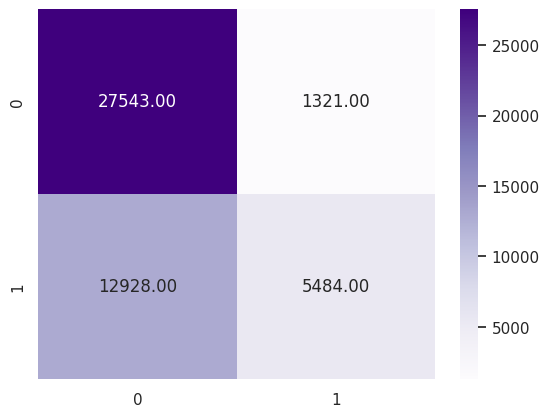

In [ ]:
from joblib import dump
from joblib import load
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#Salviamo best_model (vedi sopra) su disco
filename = 'model_SVM.sav'
dump(modelloSVM, filename)
# some time later...
# load del modello da disco
loaded_model = load(filename)
# Load dataset eval

X_testing = data_testred.drop('Diabetes_binary', axis=1)
y_testing = data_testred['Diabetes_binary']

predictions = loaded_model.predict(X_testing)
print('Accuratezza Finale:', accuracy_score(y_testing, predictions))
cf_matrix = confusion_matrix(predictions, y_testing)
sb.heatmap(cf_matrix, annot = True, fmt=".2f", cmap='Purples')
#print('Matrice di confusione',confusion_matrix(y_testing, predictions))
print('Report', classification_report(y_testing,predictions))

Provo a verificare se posso in qualche modo migliorare l'accuratezza della regressione logistica con il tuning dei parametri tramite Grid Search e Random Search

In [ ]:
from joblib import dump
from joblib import load
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#Grid Search
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

#save the model to disk
filename = 'model_Grid.sav'
dump(grid_clf_acc, filename)
# some time later...
# load the model from disk
loaded_model = load(filename)
result = loaded_model.score(X_test, y_test)
print(result)


0.752053582711993


In [ ]:
from joblib import dump
from joblib import load
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#Salviamo best_model (vedi sopra) su disco
filename = 'model_Grid.sav'
dump(grid_clf_acc, filename)
# some time later...
# load del modello da disco
loaded_model = load(filename)
# Load dataset eval

X_testing = data_testred.drop('Diabetes_binary', axis=1)
y_testing = data_testred['Diabetes_binary']

predictions = loaded_model.predict(X_testing)
print('Accuratezza Finale:', accuracy_score(y_testing, predictions))
cf_matrix = confusion_matrix(predictions, y_testing)
sb.heatmap(cf_matrix, annot = True, fmt=".2f", cmap='Purples')
#print('Matrice di confusione',confusion_matrix(y_testing, predictions))
print('Report', classification_report(y_testing,predictions))

Accuratezza Finale: 0.7261824181402826
Report               precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     40471
         1.0       0.31      0.77      0.45      6805

    accuracy                           0.73     47276
   macro avg       0.63      0.74      0.63     47276
weighted avg       0.86      0.73      0.76     47276



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the logistic regression model
logistic_regression = LogisticRegression()

# Define hyperparameters to tune and their possible values
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solver for optimization
}

# Perform random search for hyperparameter tuning
random_search = RandomizedSearchCV(logistic_regression, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_search.predict(X_test)
#save the model to disk
filename = 'model_RandomSearch.sav'
dump(random_search, filename)
# some time later...
# load the model from disk
loaded_model = load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.7366681497489354


In [ ]:
from joblib import dump
from joblib import load
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#Salviamo best_model (vedi sopra) su disco
filename = 'model_RandomSearch.sav'
dump(random_search, filename)
# some time later...
# load del modello da disco
loaded_model = load(filename)
# Load dataset eval

X_testing = data_testred.drop('Diabetes_binary', axis=1)
y_testing = data_testred['Diabetes_binary']

predictions = loaded_model.predict(X_testing)
print('Accuratezza Finale:', accuracy_score(y_testing, predictions))
cf_matrix = confusion_matrix(predictions, y_testing)
sb.heatmap(cf_matrix, annot = True, fmt=".2f", cmap='Purples')
#print('Matrice di confusione',confusion_matrix(y_testing, predictions))
print('Report', classification_report(y_testing,predictions))

Accuratezza Finale: 0.7304975040189525
Report               precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     40471
         1.0       0.32      0.77      0.45      6805

    accuracy                           0.73     47276
   macro avg       0.63      0.75      0.64     47276
weighted avg       0.86      0.73      0.77     47276



 **7 Analisi del dataset mediante Regressione Lineare**

Si vuole provare l' impossibilità di utilizzare un task di analisi differente dalla classificazione per il dataset trattato e la feature target. A dimostrazione di ciò si utilizza un algoritmo di Regressione Lineare.

In [ ]:
from sklearn.linear_model import LinearRegression
X = data_trainred.drop("Diabetes_binary", axis=1).values
y = data_trainred["Diabetes_binary"].values
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=0) #test_size è la percentuale di rapresentanza del test set

lnR=LinearRegression()
lnR.fit(X_train, y_train)
y_pred=lnR.predict(X_test)

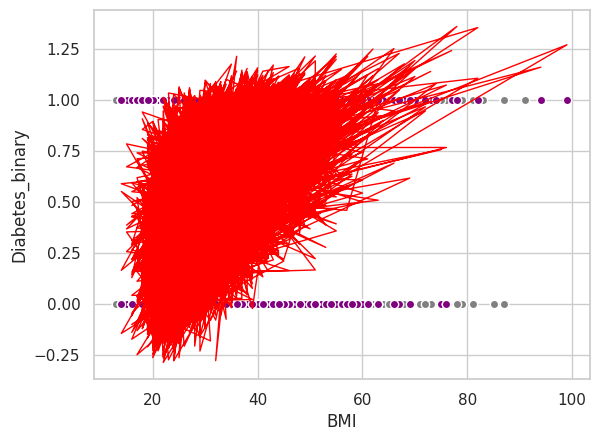

In [ ]:
X = data_trainred["BMI"].values
y = data_trainred["Diabetes_binary"].values
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=0) #test_size è la percentuale di rapresentanza del test set

plt.scatter(X_train, y_train, c="gray", edgecolor="white", label="train set")
plt.scatter(X_test, y_test, c="purple", edgecolor="white", label="test set")

plt.xlabel('BMI')
plt.ylabel('Diabetes_binary')

plt.plot(X_test, y_pred, color='red', linewidth= 1)

Come osservabile dal grafico in output la regressione lineare non è il metodo più appropriato per la classificazione binaria. La regressione lineare è una tecnica utilizzata per modellare la relazione tra una variabile dipendente continua e una o più variabili indipendenti.E'  adatta per problemi di regressione dove l'obiettivo è predire un valore continuo mentre nel nostro caso la feature Target è binaria.